# Time Series Clustering with K-Means and Euclidean Distance Matrix for total (n2)


This notebook provides a base clustering for ordinary and scripted trips together without feature engineering and K-Means with k=3. k=3 follows the naive assumption that the cluster structure is only influenced by the labels. 

We found that there are the following problems with this base line approach:
- Mode "METRO" and "TRAM" are not clustered distinctly
- Mode "WALK" has too many clusters
- We have to cut more than 30 seconds from the scripted trips during preprocessing

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv
import numpy as np
import pandas as pd
#Visualisation Libraries
#%matplotlib inline
# Uncomment if you want interactive 3D plots --> does not work in the github rendering
%matplotlib notebook
from copy import deepcopy

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import seaborn as sns
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

%aimport visualization.visualize
from visualization.visualize import get_color_encoding
from visualization.visualize import plot_timeseries_clustering
from visualization.visualize import get_plot_timeseries_clustering_variables
%aimport data.preprocessing
from data.preprocessing import Preprocessor
%aimport data.download
from data.download import DatasetDownloader
%aimport utils.utilities
from utils.utilities import get_cluster_labels

%aimport models.cluster
from models.cluster import get_clustering_performance

In [2]:
data_dir = os.path.join(os.path.abspath(DatasetDownloader.get_data_dir()))
#file_path = os.path.join(data_dir, "preprocessed","preprocessed_data.dat")
file_path = os.path.join(data_dir, "preprocessed","preprocessed_data_individual.dat")

dfs = Preprocessor.restore_preprocessed_data_from_disk(file_path)
xyz_euclidean_distances = pd.read_csv(os.path.join(data_dir,"preprocessed","preprocessed_data_individual_euclidean_xyz.csv"), sep=";")
xyz_euclidean_distances = xyz_euclidean_distances[xyz_euclidean_distances["scripted"] == 1]

In [3]:
categorical_columns = ["mode","notes","scripted","token","trip_id"]

trips_cut_per_30_sec = Preprocessor.get_cut_trip_snippets_for_targets(dfs,["total"])[0]
scripted_trips_only = trips_cut_per_30_sec[trips_cut_per_30_sec["scripted"] == 1]
scripted_trips_only = scripted_trips_only.reset_index(drop=True)



euclidean_distances = xyz_euclidean_distances.reset_index(drop=True)#Preprocessor.calculate_distance_for_n2(scripted_trips_only, metric="euclidean")
correlation_distances = Preprocessor.calculate_distance_for_n2(scripted_trips_only, metric="correlation")
#file_path = os.path.join(data_dir, "preprocessed","449_train_loss_0.0771002_encodings.csv")
#encoded_distances = pd.read_csv(file_path, sep=";", index_col=False).drop(["Unnamed: 0"],axis=1)

In [4]:
scripted_trips_only

snippet_0 snippet_1 snippet_2 snippet_3 snippet_4 snippet_5 snippet_6  \
0     9.27849   9.29666   9.30395   9.28263    9.2591   9.25811   9.30216   
1      9.5874     9.572   9.55719   9.57063   9.61084   9.56583    9.6431   
2     9.30191   9.27454    9.3113     9.408   9.39396   9.50659   9.33227   
3      9.4477   9.49347    9.4675   9.48468   9.44877    9.4531    9.4406   
4     9.66164   9.64816    9.5314   9.61267   9.63384   9.63574   9.75291   
5     9.38341   9.41197   9.36727   9.38794   9.37117   9.40209    9.4055   
6     9.53663   9.53376   9.52009   9.51867   9.53758   9.52881   9.52401   
7     9.51243   9.67804   9.58548   9.79228   9.63037   9.74404   9.68698   
8     9.55877   9.57269    9.5661   9.60994   9.60883   9.61087   9.62648   
9      9.6483   9.64032    9.6347   9.62284   9.59616   9.58627   9.58493   
10     9.6106   9.48841   9.57623   9.63898   9.70401   9.71146   9.73572   
11    9.62411   9.59742   9.60295   9.54921   9.57463   9.62235   9.59399   
12    9.74352   9.73626   9.69163   9.70709   9.69311   9.71069   9.71362   
13    9.21017   9.32849   9.20204   9.11009    9.3653   9.27282   9.71005   
14    9.63003   9.62862   9.61047    9.5722   9.56463   9.61694    9.6378   
15    9.85702   9.87319   9.82015   9.82215   9.80482   9.71155   9.65654   
16    9.63155   9.55836   9.60241   9.52132   9.63106   9.59354   9.60328   
17    9.60314   9.60837   9.59089   9.61097   9.62742   9.56891    9.6151   
18    9.84843   9.51922   9.75357   9.52673   9.64381   9.53594   9.61313   
19    9.85895   9.82959   9.84921   9.82816   9.87876   9.83519   9.86156   
20    9.73897    9.9402   9.87124   10.0146   10.0389   9.92549   9.92794   
21    9.83561   9.88796   9.84168   9.85817   9.85003   9.86624   9.87471   
22    9.86271   9.82455   9.84092   9.83896   9.83219   9.85288   9.84563   
23    9.73338   9.54288   9.75215    9.4831   9.70637   9.60869   9.91791   
24    9.81513    9.7598   9.86726   9.79049    9.8956   9.79169   9.73853   
25    9.80466   9.83416   9.86286   9.81576   9.99074   9.84222   9.85825   
26    9.77831   9.75088   9.79846   9.86228    9.7563   9.92637   9.89867   
27    9.73348   9.74722   9.74533   9.76546   9.73161   9.74994   9.75131   
28    9.69003   9.72439   9.62077   9.64095   9.62053   9.64255   9.66056   
29    9.47993   9.40337   9.41675    9.4609    9.3944   9.46954   9.44294   
..        ...       ...       ...       ...       ...       ...       ...   
881   9.39029   9.48035    9.4019   9.23761   9.33369   9.14524   9.04242   
882   9.25293   9.28042   9.29553   9.46558   9.48914   9.39677   9.35946   
883   9.24319   9.24042   9.22617   9.22679   9.23031   9.23541   9.23494   
884    9.0623   9.03753    8.9059   8.99342   9.21025   9.36393   9.38543   
885   9.50091   9.52554   9.48858   9.27993   9.25463   9.13195   9.04775   
886   9.23981   9.23333   9.20969   9.25705   9.22066   9.25378   9.18469   
887   9.22812   9.24202   9.20599   9.22881   9.25355   9.24537   9.24135   
888   9.09824   9.17396   9.06236   9.28362   9.41306   9.28403   9.40544   
889   9.28802   9.09015   9.16874   9.10254   9.24601   9.05408   9.20531   
890   9.25204   9.26391   9.26087   9.27239   9.26162   9.27485   9.25498   
891   9.23864    9.1603   9.24124   9.31918    9.3039   9.23796   9.25549   
892   9.16317   9.18141   9.19417    9.3149   9.37694   9.35319   9.43456   
893   9.26401   9.28107   9.27414    9.2801   9.29543   9.28399   9.30142   
894   9.22634   9.30271   9.26176   9.24569    9.2506   9.34624   9.39131   
895   9.30186   9.30559   9.30797   9.32643   9.22577   9.25414   9.29562   
896   9.30525   9.36831   9.32782    9.3452   9.27528   9.30891   9.25368   
897   9.25971   9.30215   9.35548   9.30866    9.2501   9.32408   9.26668   
898   9.34052   9.40482   9.42368    9.3013    9.4159    9.3001   9.37279   
899   9.26983   9.26485   9.27834   9.26712   9.28508   9.26848   9.25023   
900   9.36935   9.44815   9.60355   9.57438   9.40123   9.31263   9.08695   


## Summary Statistics of euclidean distances:

In [5]:
categorical_columns = ["mode","notes","scripted","token","trip_id"]

trips_only = euclidean_distances.drop(categorical_columns,axis=1)
#print(trips_only.shape)
#trips_only.head(5)

In [42]:
percentiles=[0.1*(i+1) for i in range(10)]
summaries_euclidean = trips_only.transpose().describe(percentiles=percentiles).T
summaries_euclidean = summaries_euclidean.drop(["count","min","max","mean"],axis=1)
summaries_euclidean.head()

std         1%         2%         3%          4%          5%  \
0  103.710352  42.946769  81.935874  89.660517  107.233742  116.750300   
1  102.826887  41.560959  84.986912  90.308119  108.497877  116.834094   
2  104.463021  27.925393  69.323407  72.878302   90.041253   95.517763   
3  104.281377  38.657770  80.082619  86.021676  104.143748  112.615383   
4  104.641815  32.743568  70.218480  74.607448   88.908032   95.275187   

           6%        7.0%          8%          9%     ...             91%  \
0  121.581935  129.484427  137.051684  146.272694     ...      431.752634   
1  121.764372  134.003628  140.915265  146.987587     ...      432.386735   
2  101.915136  117.796108  127.402131  132.351738     ...      428.735458   
3  117.175797  129.730226  136.467889  143.314801     ...      433.710127   
4  101.881867  118.178137  127.443286  133.044618     ...      430.467394   

          92%         93%         94%         95%         96%         97%  \
0  436.946285  440.060291  442.776022  445.544636  447.356383  448.890001   
1  437.115302  440.659003  443.131019  445.805595  447.410502  449.346258   
2  431.412753  434.275486  436.594302  439.557818  441.685764  443.730361   
3  438.995492  441.489884  444.387551  447.233629  449.069420  450.950772   
4  433.771585  435.813119  438.345817  441.508086  443.422230  445.394062   

          98%         99%        100%  
0  451.828278  457.854782  465.833127  
1  452.759773  459.302107  468.107248  
2  446.743577  454.442001  465.503791  
3  453.772391  460.915439  468.527261  
4  448.189401  458.211814  467.649470  

[5 rows x 101 columns]

## Summary Statistics of correlation distances:

In [7]:
summaries_corr = correlation_distances.drop(categorical_columns,axis=1).transpose().describe(percentiles=percentiles).T
summaries_corr = summaries_corr.drop(["count","min","max","mean"],axis=1)
summaries_corr.head()

std       10%       20%       30%       40%       50%       60%  \
0  0.155888  0.815880  0.915553  0.967984  0.988431  1.005461  1.021667   
1  0.099426  0.887039  0.932265  0.962839  0.984996  1.001117  1.016357   
2  0.107916  0.888512  0.932854  0.965125  0.984043  1.003223  1.026992   
3  0.178143  0.799147  0.902934  0.959951  0.983579  1.003976  1.026416   
4  0.086693  0.907576  0.943916  0.969340  0.988270  1.003656  1.019018   

        70%       80%       90%  
0  1.048852  1.087565  1.146007  
1  1.036405  1.065581  1.110544  
2  1.046220  1.071889  1.126586  
3  1.058623  1.103453  1.198086  
4  1.036018  1.054700  1.105089

## Use Correlation distance and euclidean distance summary features together

In [8]:
summaries = deepcopy(summaries_euclidean)
for name in summaries_euclidean.columns:
    summaries["cor_"+name] = summaries_corr[name]

summaries.head()

std         10%         20%         30%         40%         50%  \
0  103.710352  152.915875  207.434465  251.310678  292.752069  323.184511   
1  102.826887  153.400984  213.871441  255.455343  296.377515  326.980254   
2  104.463021  137.191405  211.386191  261.345717  306.256676  335.008747   
3  104.281377  150.036859  211.424355  255.896884  298.319449  329.028387   
4  104.641815  137.030018  213.600523  264.268883  309.719492  338.104156   

          60%         70%         80%         90%   cor_std   cor_10%  \
0  361.792485  381.422113  394.096697  428.562400  0.155888  0.815880   
1  363.384352  383.122012  395.641172  428.881719  0.099426  0.887039   
2  354.808426  375.082875  385.915902  424.499977  0.107916  0.888512   
3  363.413201  381.930273  394.695587  430.116170  0.178143  0.799147   
4  356.133179  376.126457  387.647369  427.011316  0.086693  0.907576   

    cor_20%   cor_30%   cor_40%   cor_50%   cor_60%   cor_70%   cor_80%  \
0  0.915553  0.967984  0.988431  1.005461  1.021667  1.048852  1.087565   
1  0.932265  0.962839  0.984996  1.001117  1.016357  1.036405  1.065581   
2  0.932854  0.965125  0.984043  1.003223  1.026992  1.046220  1.071889   
3  0.902934  0.959951  0.983579  1.003976  1.026416  1.058623  1.103453   
4  0.943916  0.969340  0.988270  1.003656  1.019018  1.036018  1.054700   

    cor_90%  
0  1.146007  
1  1.110544  
2  1.126586  
3  1.198086  
4  1.105089

In [9]:
from sklearn.preprocessing import scale

summaries_scaled = pd.DataFrame(scale(summaries),columns=summaries.columns)
summaries_scaled.head()

std       10%       20%       30%       40%       50%       60%  \
0 -0.852259  0.338732  0.401653  0.269196 -0.056125 -0.125590  1.037446   
1 -0.917423  0.346390  0.513968  0.347871  0.048111  0.086543  1.131201   
2 -0.796741  0.090495  0.470605  0.459683  0.332149  0.535233  0.626108   
3 -0.810139  0.293282  0.471271  0.356252  0.103944  0.201007  1.132900   
4 -0.783553  0.087948  0.509241  0.515171  0.431709  0.708226  0.704132   

        70%       80%       90%   cor_std   cor_10%   cor_20%   cor_30%  \
0  0.856028 -0.039174 -0.608428  2.562851 -2.386484 -1.872635 -0.761478   
1  0.945373  0.033169 -0.600660  0.374214 -0.486824 -0.973742 -1.327376   
2  0.522843 -0.422363 -0.707249  0.703334 -0.447483 -0.942087 -1.075926   
3  0.882737 -0.011122 -0.570632  3.425505 -2.833201 -2.551372 -1.645060   
4  0.577693 -0.341261 -0.646159 -0.119327  0.061437 -0.347105 -0.612322   

    cor_40%   cor_50%   cor_60%   cor_70%   cor_80%   cor_90%  
0 -0.240263  2.156009  2.006898  2.301771  2.022732  1.513853  
1 -1.010207  0.315554  0.968653  1.039721  0.833546  0.494933  
2 -1.223934  1.207616  3.047912  2.034912  1.174777  0.955863  
3 -1.327768  1.526944  2.935251  3.292435  2.882173  3.010140  
4 -0.276323  1.391257  1.488975  1.000464  0.244939  0.338213

## Apply PCA to euclidean distances and to summaries

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
trips_reduced = pd.DataFrame(pca.fit_transform(trips_only))

pca_2 = PCA(n_components=5)
summaries_reduced = pd.DataFrame(pca_2.fit_transform(scale(summaries_euclidean)))

features_used = summaries_reduced
#trips_reduced.head()

### Plot first two principle components

C:\Users\Lukas\.conda\envs\Tensorflow\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


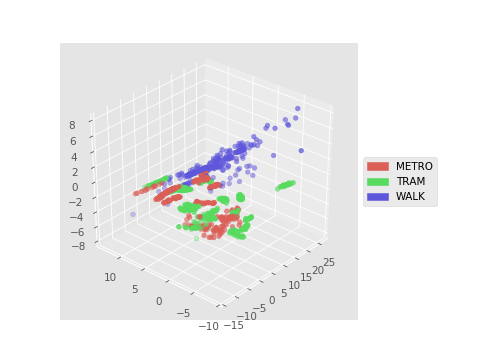

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors, color_patches = get_color_encoding(euclidean_distances["mode"])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          handles=color_patches)
ax.scatter(features_used[0],features_used[1],features_used[2],c=colors)
plt.show();

C:\Users\Lukas\.conda\envs\Tensorflow\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


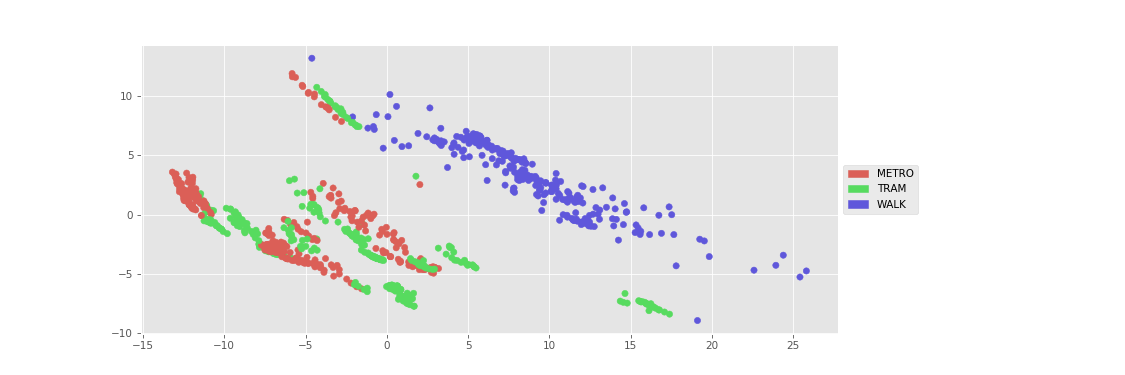

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
colors, color_patches = get_color_encoding(euclidean_distances["mode"])


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          handles=color_patches)
ax.scatter(features_used[0],features_used[1],color=colors);

------
## Create Base Model with Euclidean Distance and KMeans Clustering

Use summaries of each distance

In [12]:
#from sklearn.cluster import DBSCAN
#random_state = 0
#features_used = encoded_distances.drop(categorical_columns,axis=1)
#db = DBSCAN(eps=0.7, min_samples=5).fit(features_used)

#cluster_labels = db.labels_
#print("unique cluster labels: ", set(cluster_labels))
#euclidean_distances["cluster_labels"]=cluster_labels


In [13]:
from sklearn.cluster import KMeans
random_state = 0

#Naive asumption of 3 clusters due to 3 labels Walk, Metro and Tram 
kmeans = KMeans(n_clusters=3, random_state=random_state).fit(features_used)
cluster_labels = kmeans.labels_
euclidean_distances["cluster_labels"]=cluster_labels

### Summary Statistics for KMeans Clustering:

Here the performance is evaluated in regard to the "true labels" which here corresponds to the transport mode.

In [14]:
# how well does it capture the label information
get_clustering_performance(features_used, cluster_labels,
                           true_labels=euclidean_distances["mode"])

['Estimated number of clusters: 3',
 'True number of clusters: 3',
 'Homogeneity: 0.449',
 'Completeness: 0.440',
 'V-measure: 0.445',
 'Adjusted MI: 0.439',
 'Silhouette Coefficient: 0.644']

In [15]:
# Uncomment if you want to explore full dataframe
#with pd.option_context('display.max_rows', None):
#    display(scripted_trips[scripted_trips["scripted"]==0])

## Visualise clustering result for one specific trip

Select one trip:

In [16]:
selected_trip = 5
small_df_trip = euclidean_distances[euclidean_distances.trip_id == selected_trip]
small_df_trip.head()

distance_0  distance_1  distance_2  distance_3  distance_4  distance_5  \
79  383.665017  384.322197  370.922038  383.270080  371.392236  369.849262   
80  385.934340  386.639088  373.546748  385.712378  374.113738  372.452448   
81  388.306117  389.147249  375.998370  388.036124  376.459965  374.952278   
82  388.859291  389.699802  376.489126  388.646199  377.057816  375.413080   
83  388.640052  389.590908  376.236419  388.441531  376.728064  375.113361   

    distance_6  distance_7  distance_8  distance_9       ...        \
79  381.713155  365.528267  373.101873  383.170842       ...         
80  384.558930  368.147632  375.694348  385.893304       ...         
81  386.654278  370.748086  378.192797  388.300148       ...         
82  387.148057  371.241843  378.693863  388.903522       ...         
83  387.099244  370.833800  378.385568  388.685955       ...         

    distance_1607  distance_1608  distance_1609  distance_1610  mode  \
79     346.004942     270.614456     231.247057     320.735713  WALK   
80     348.525555     274.757160     235.154071     322.346035  WALK   
81     349.814745     278.393311     237.617739     322.950461  WALK   
82     349.927160     278.833153     241.211252     326.321383  WALK   
83     348.978276     275.810607     239.077523     326.103892  WALK   

       notes  scripted            token  trip_id  cluster_labels  
79  scripted         1  355007075245007        5               0  
80  scripted         1  355007075245007        5               0  
81  scripted         1  355007075245007        5               0  
82  scripted         1  355007075245007        5               0  
83  scripted         1  355007075245007        5               0  

[5 rows x 1617 columns]

First, make sure that cut trips and original trips are the same by checking the first values in the total column

In [17]:
trips_cut_per_30_sec[trips_cut_per_30_sec.trip_id == selected_trip].head(1)

snippet_0 snippet_1 snippet_2 snippet_3 snippet_4 snippet_5 snippet_6  \
103   14.1751   14.4321   16.5716    12.784   8.81912   6.02161    4.1676   

    snippet_7 snippet_8 snippet_9   ...   snippet_595 snippet_596 snippet_597  \
103   4.49849   9.06437    22.419   ...       13.8621     11.4552     7.93498   

    snippet_598 snippet_599  mode     notes scripted            token trip_id  
103     7.35003     4.85618  WALK  scripted        1  355007075245007       5  

[1 rows x 605 columns]

In [18]:
trips_unpacked = Preprocessor.unpack_all_trips(dfs)
#trips_unpacked = [trip_i for trip_i in trips_unpacked if "scripted" in str(trip_i["annotation"]["notes"][0]).lower()]

acceleration_data_trip = trips_unpacked[selected_trip]["sensor"]
acceleration_data_trip = deepcopy(acceleration_data_trip[acceleration_data_trip.sensor == "acceleration"])
# Important, because indices are not unique
acceleration_data_trip = acceleration_data_trip.reset_index(drop=True)

acceleration_data_trip.head()

time      total         x          y         z  \
0 2017-12-12 15:44:19.973  14.175124 -0.285985  13.933329  2.591274   
1 2017-12-12 15:44:20.018  14.432075  3.002282  13.870204  2.624601   
2 2017-12-12 15:44:20.068  16.571573  7.334171  14.842432 -0.727459   
3 2017-12-12 15:44:20.118  12.784040  3.683990  12.227089 -0.598481   
4 2017-12-12 15:44:20.168   8.819115  0.451098   7.922455  3.848117   

         sensor  
0  acceleration  
1  acceleration  
2  acceleration  
3  acceleration  
4  acceleration

During the cutting process the last segments which are less than 30 seconds are dropped, thats why we have to drop them in the original dataframe as well:

In [19]:
labels = get_cluster_labels(small_df_trip["cluster_labels"])
diff = acceleration_data_trip.shape[0] - len(labels)
rows_to_be_dropped = acceleration_data_trip.tail(diff).index
acceleration_data_trip = acceleration_data_trip.drop(rows_to_be_dropped)
acceleration_data_trip["cluster_labels"]= labels
acceleration_data_trip.head()

time      total         x          y         z  \
0 2017-12-12 15:44:19.973  14.175124 -0.285985  13.933329  2.591274   
1 2017-12-12 15:44:20.018  14.432075  3.002282  13.870204  2.624601   
2 2017-12-12 15:44:20.068  16.571573  7.334171  14.842432 -0.727459   
3 2017-12-12 15:44:20.118  12.784040  3.683990  12.227089 -0.598481   
4 2017-12-12 15:44:20.168   8.819115  0.451098   7.922455  3.848117   

         sensor  cluster_labels  
0  acceleration               0  
1  acceleration               0  
2  acceleration               0  
3  acceleration               0  
4  acceleration               0

<IPython.core.display.Javascript object>


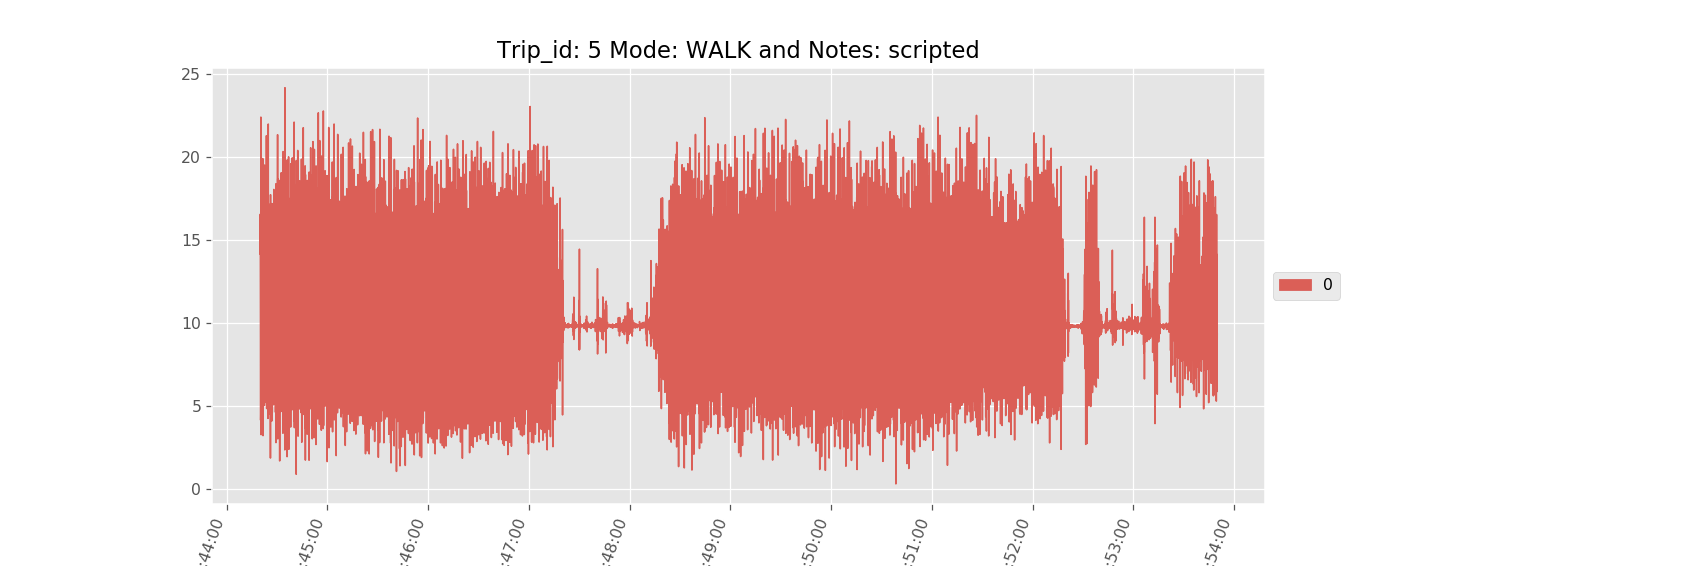

In [20]:
mode = trips_unpacked[selected_trip]["annotation"]["mode"][0]
notes = trips_unpacked[selected_trip]["annotation"]["notes"][0]

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title("Trip_id: {} Mode: {} and Notes: {}".format(selected_trip, mode,notes))
plot_timeseries_clustering(acceleration_data_trip["time"],acceleration_data_trip["total"], acceleration_data_trip["cluster_labels"], ax=ax)

## Plot the distribution of modes to cluster label for all trips

From this we can see that it the clustering is not distinct between "WALK" and "TRAM"

In [21]:
def get_distribution_of_cluster_labels_for(target, distance_matrix):
    column_names = ["count_cluster_"+str(i) for i in np.sort(distance_matrix["cluster_labels"].unique())]
    column_names += [target]
    dist_df = pd.DataFrame(columns=column_names)
    # Collect cluster counts per mode
    for index, target_value in enumerate(distance_matrix[target].unique()):
        distance_per_target_value = distance_matrix[distance_matrix[target]==target_value]
        dist_df.loc[index,target]=target_value
        cluster_label_dist = distance_per_target_value.groupby("cluster_labels").count()[target]
        for cluster_id, label_count in cluster_label_dist.iteritems():
                dist_df.loc[index,"count_cluster_"+str(cluster_id)]=label_count

        dist_df.fillna(0,inplace=True)

    return dist_df

mode_dist_df = get_distribution_of_cluster_labels_for("mode", euclidean_distances)
mode_dist_df

count_cluster_0  count_cluster_1  count_cluster_2   mode
0             16.0            184.0            101.0  METRO
1            282.0              0.0              0.0   WALK
2             26.0            188.0            114.0   TRAM

<IPython.core.display.Javascript object>


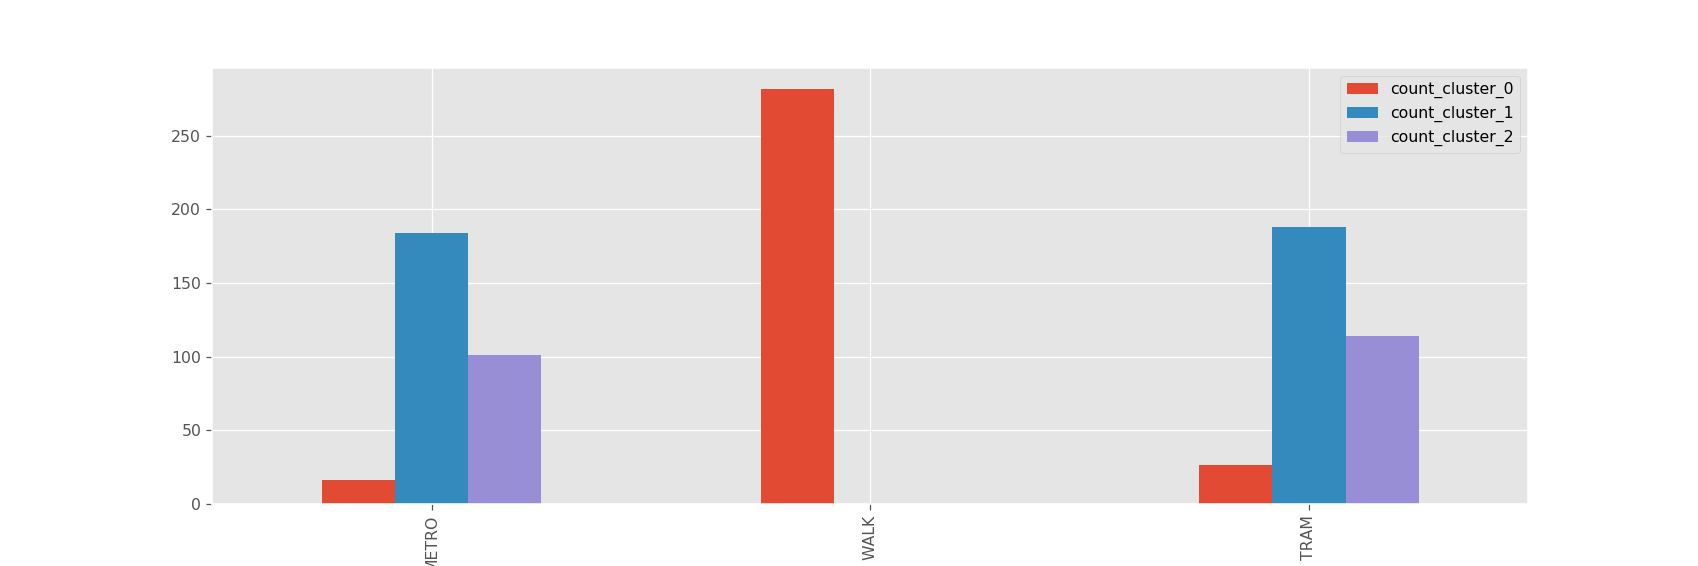

In [22]:
mode_dist_df.set_index("mode").plot(kind="bar",figsize=(15,5));

## Plot distribution of cluster labels for scripted and tokens

<IPython.core.display.Javascript object>


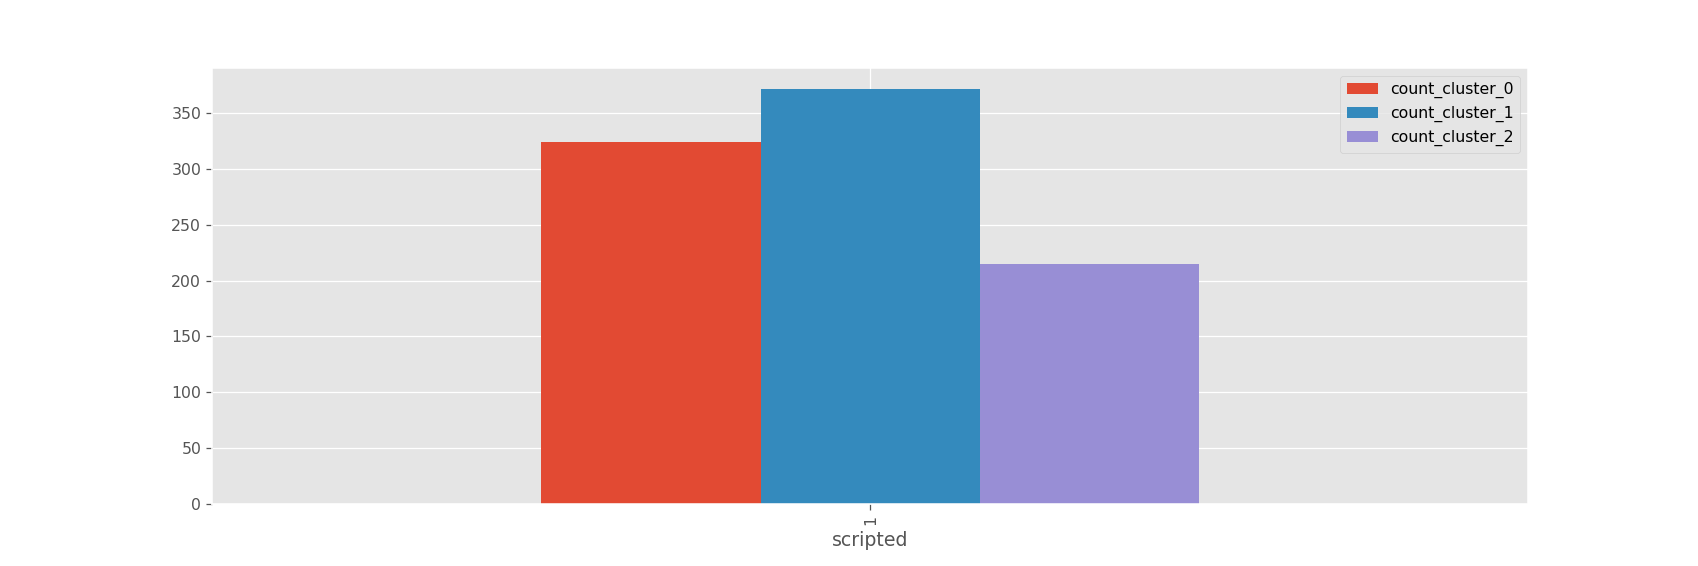

In [23]:
scripted_dist_df = get_distribution_of_cluster_labels_for("scripted", euclidean_distances)
scripted_dist_df.set_index("scripted").plot(kind="bar",figsize=(15,5));

<IPython.core.display.Javascript object>


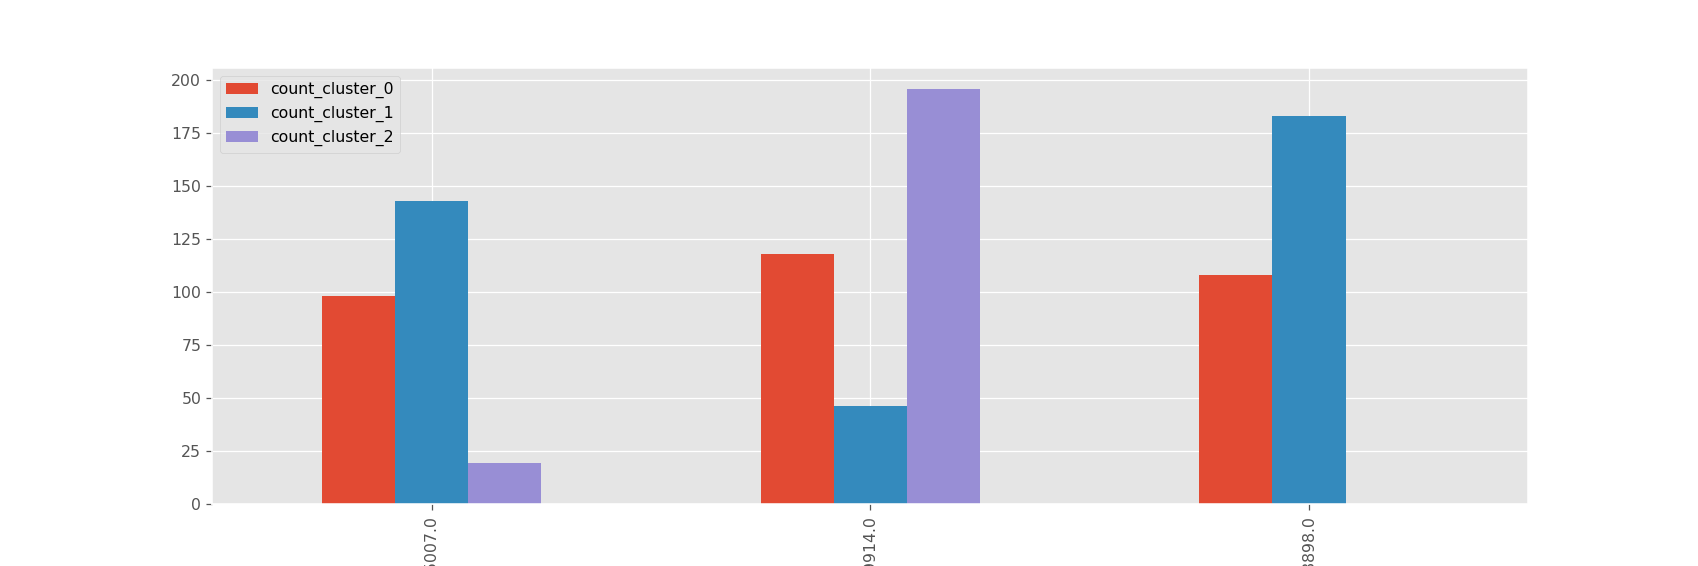

In [24]:
token_dist_df = get_distribution_of_cluster_labels_for("token", euclidean_distances)
token_dist_df.set_index("token").plot(kind="bar",figsize=(15,5));

## Plot all trips with their clustering labels

Produce this plot more conveniently by writing:

<IPython.core.display.Javascript object>


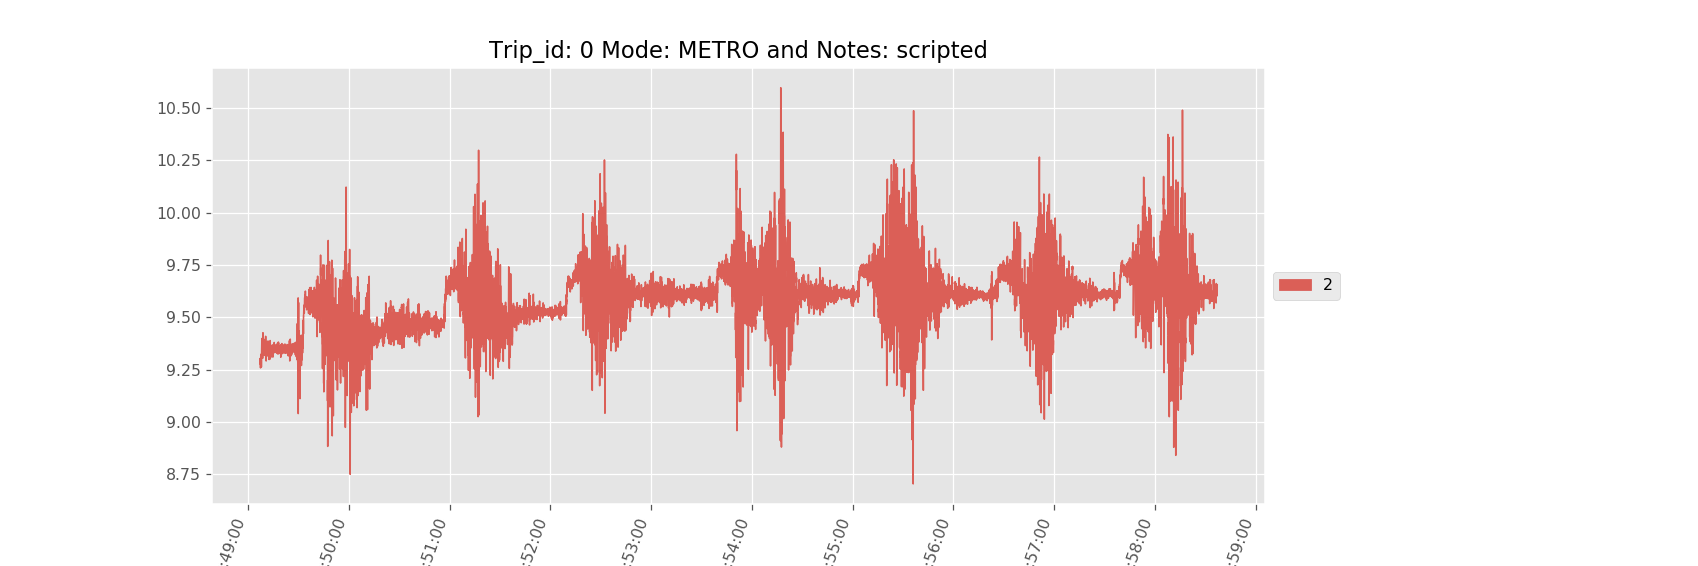

<IPython.core.display.Javascript object>


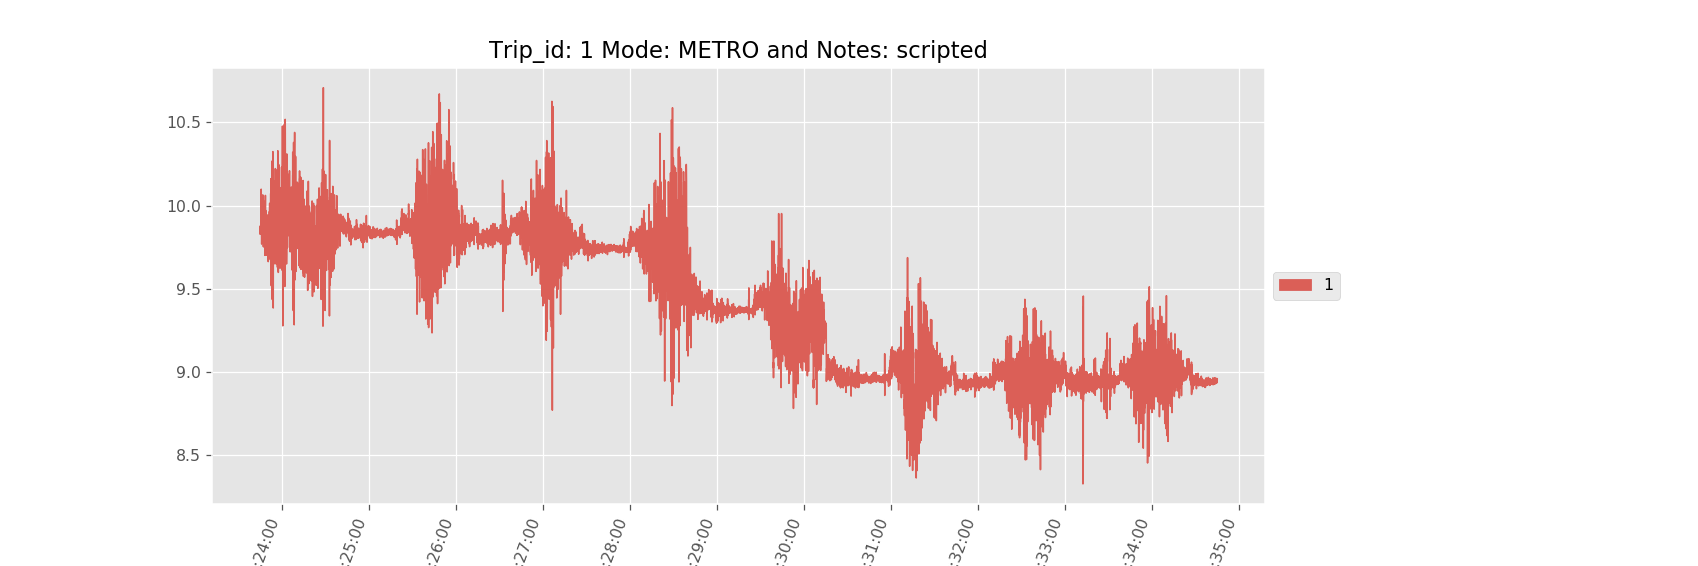

<IPython.core.display.Javascript object>


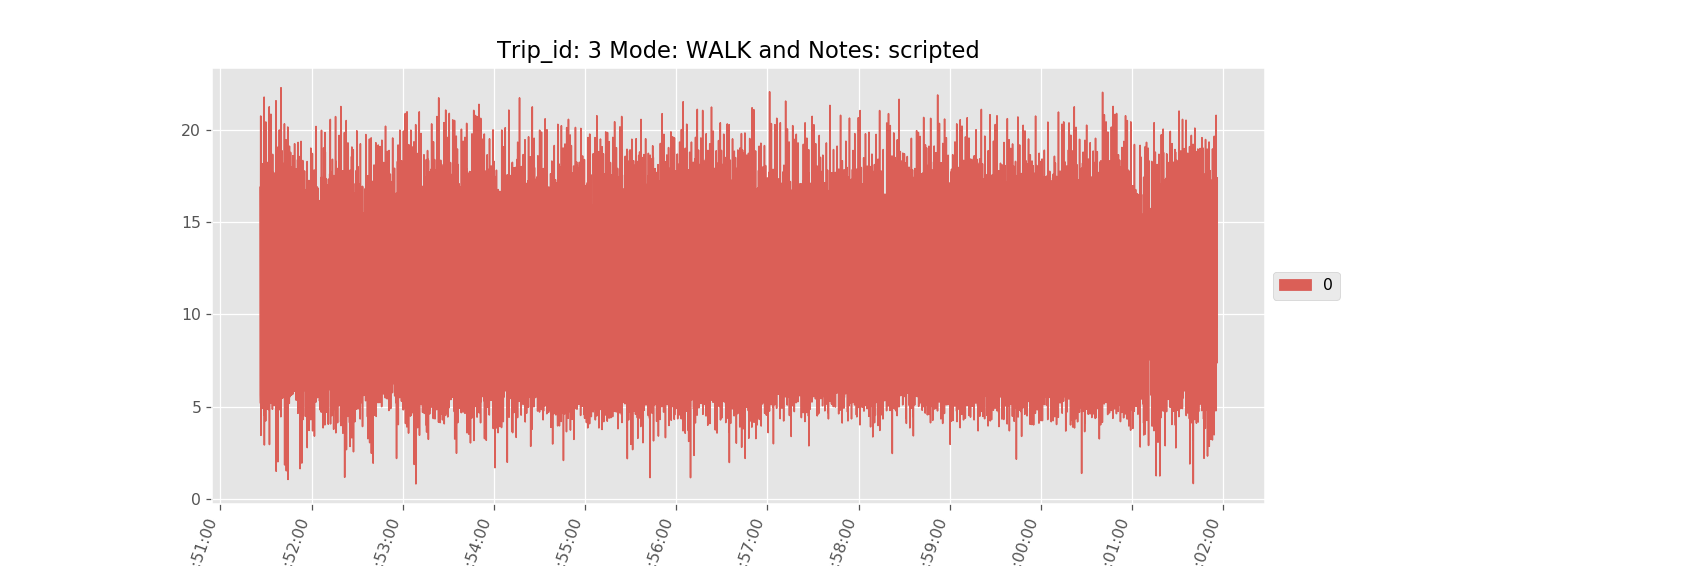

<IPython.core.display.Javascript object>


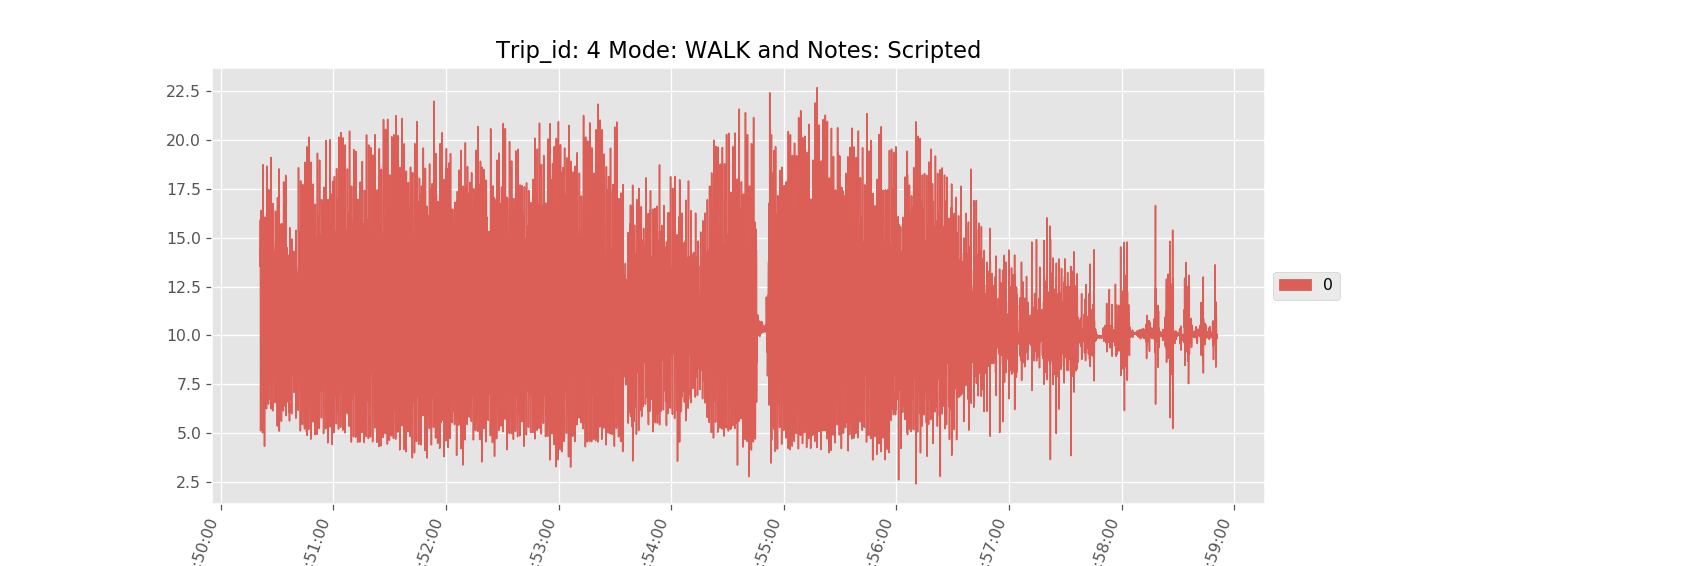

<IPython.core.display.Javascript object>


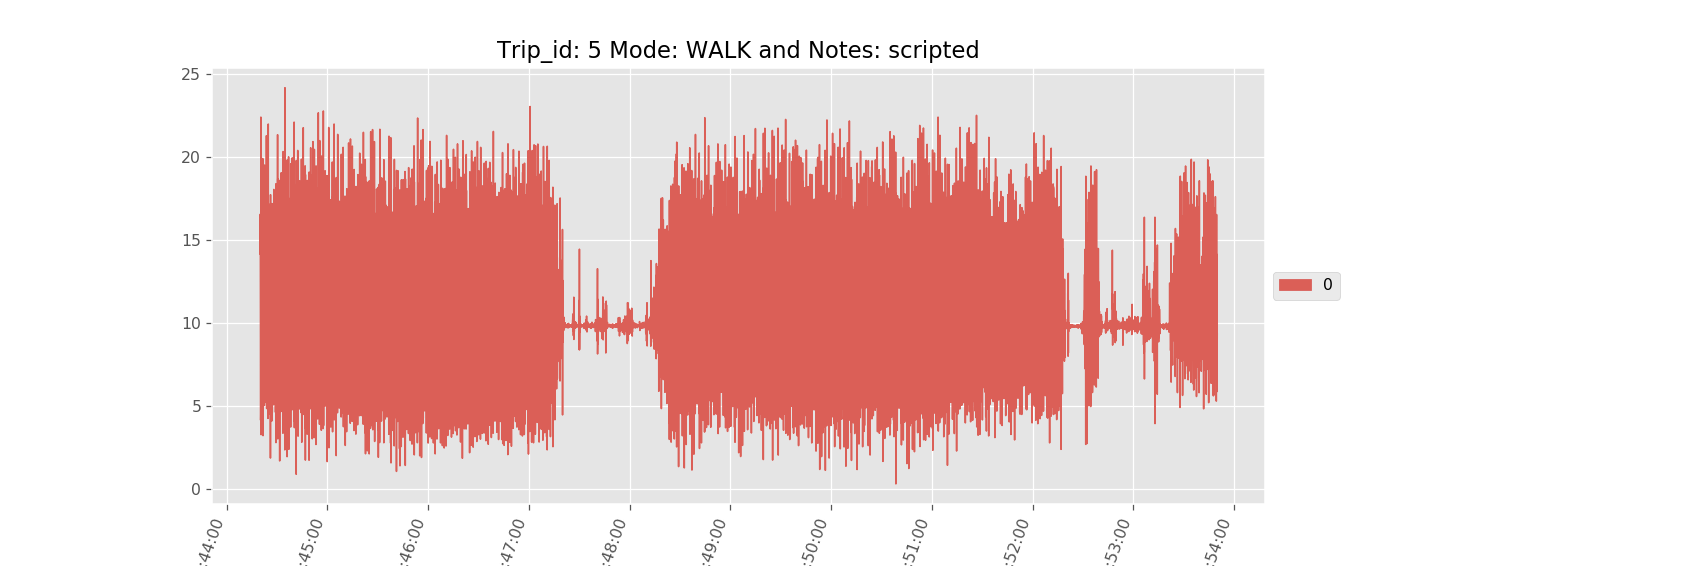

<IPython.core.display.Javascript object>


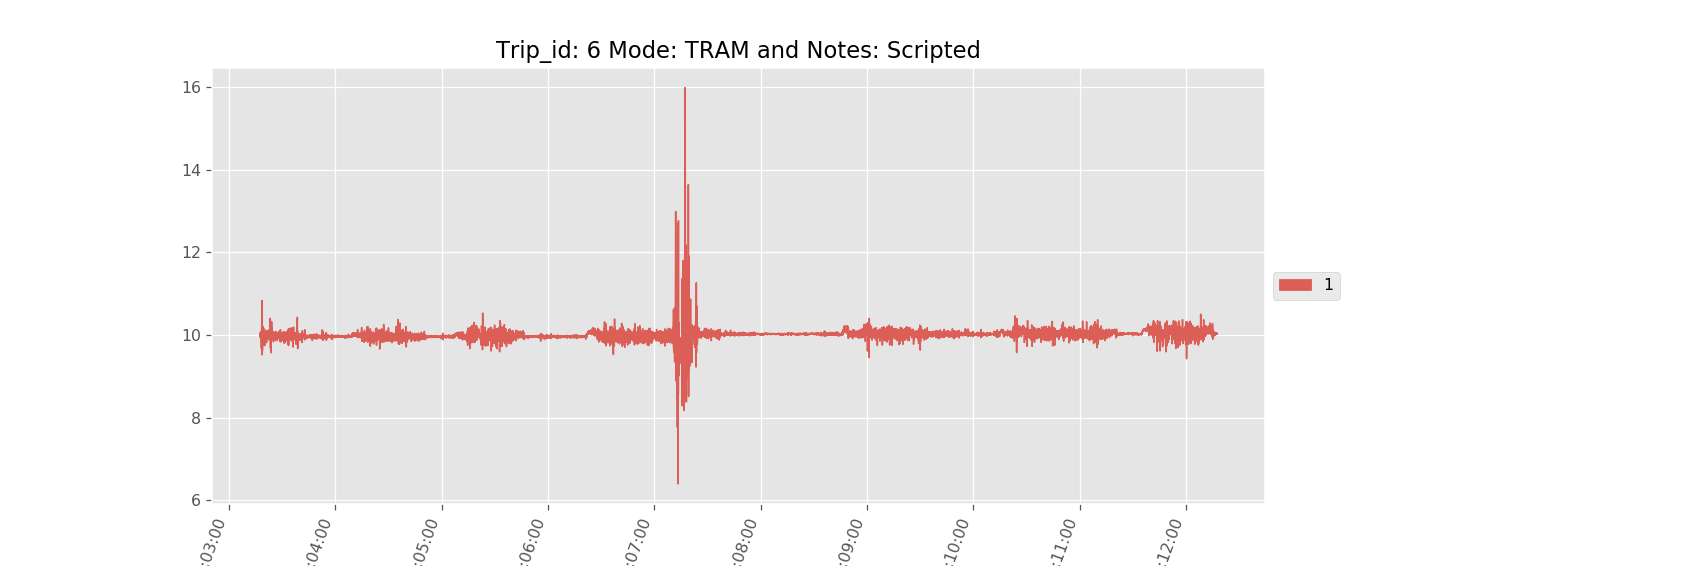

<IPython.core.display.Javascript object>


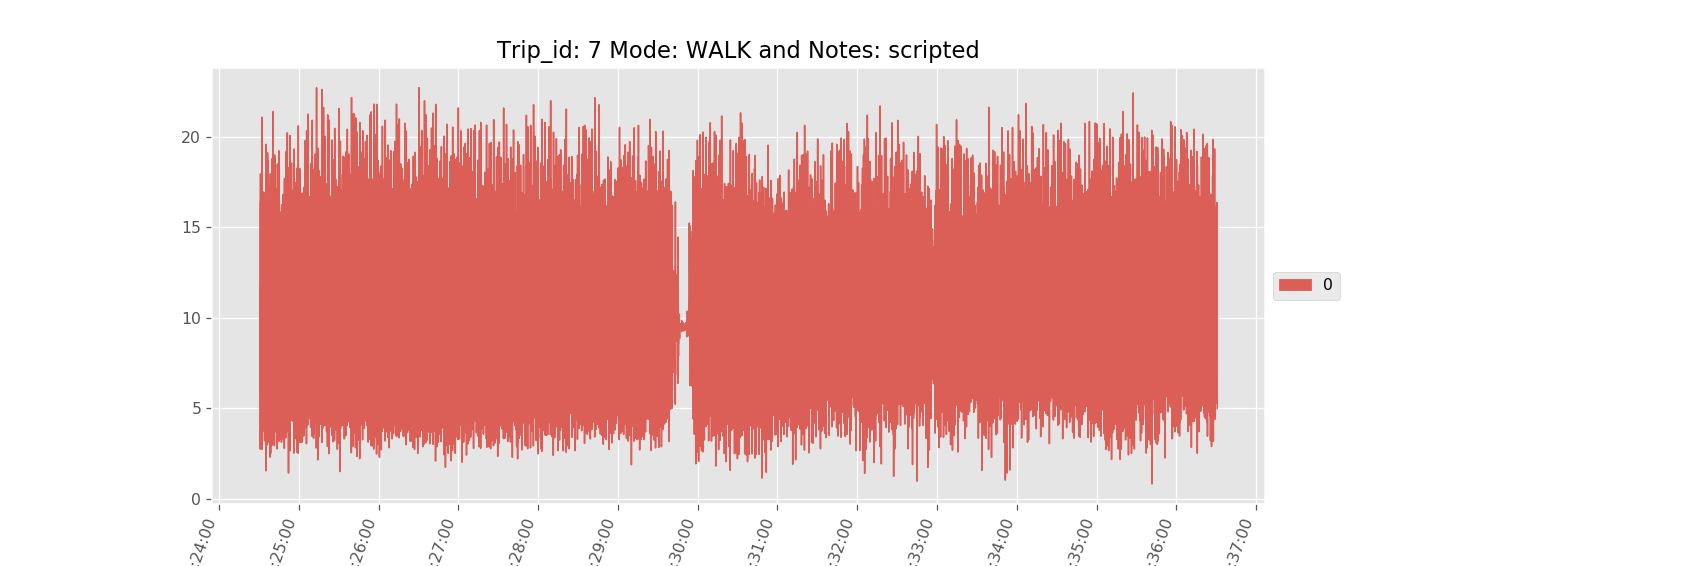

<IPython.core.display.Javascript object>


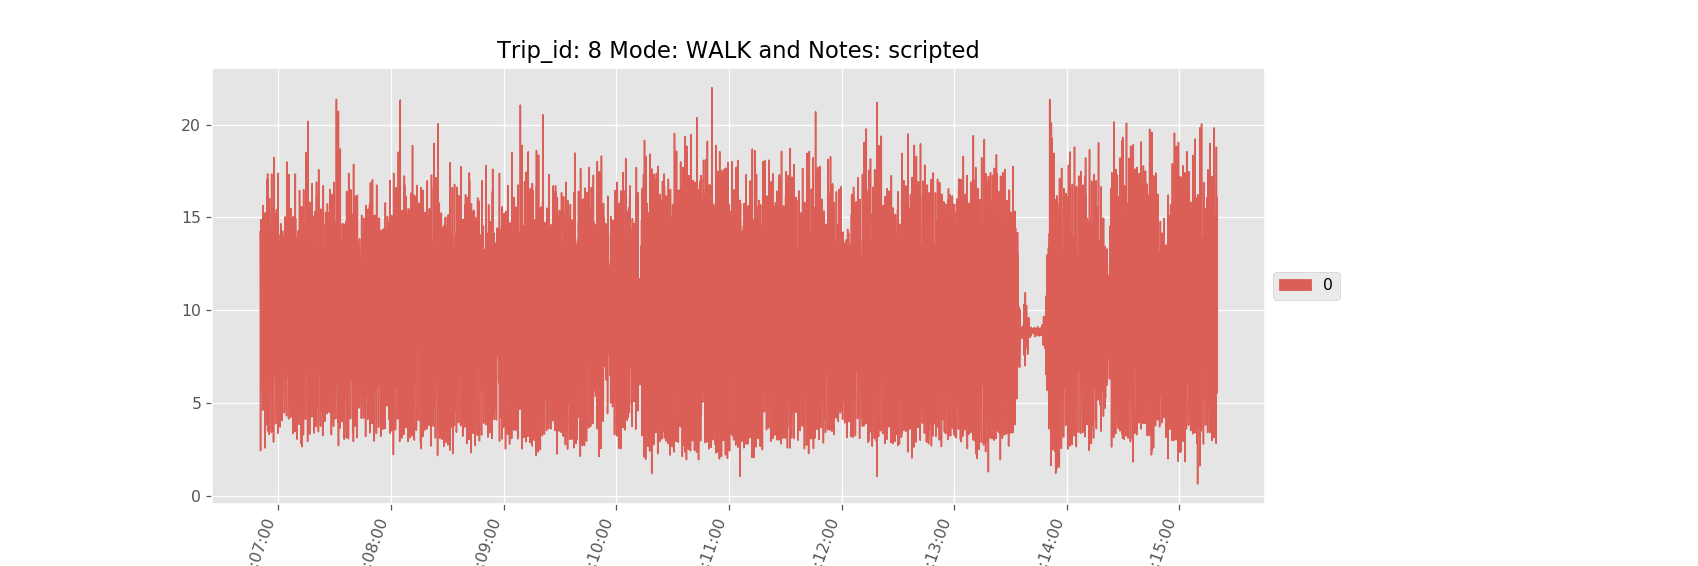

<IPython.core.display.Javascript object>


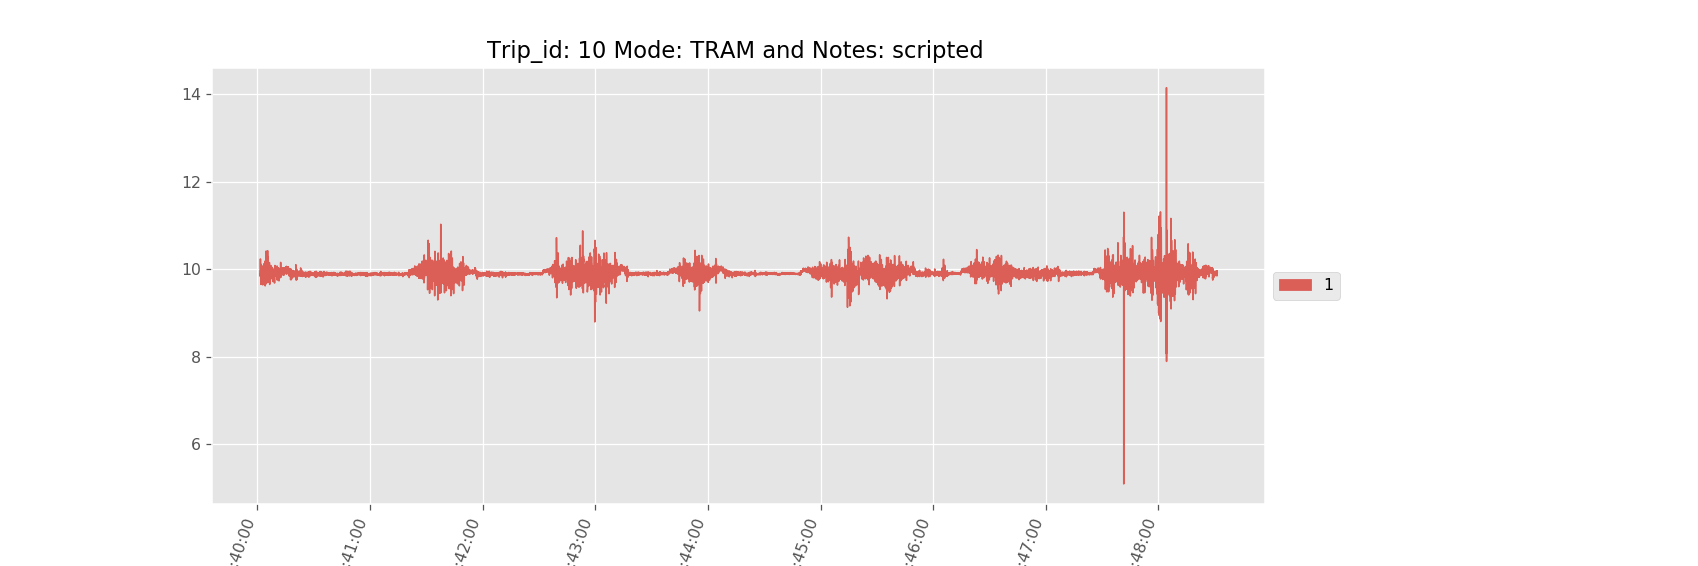

<IPython.core.display.Javascript object>


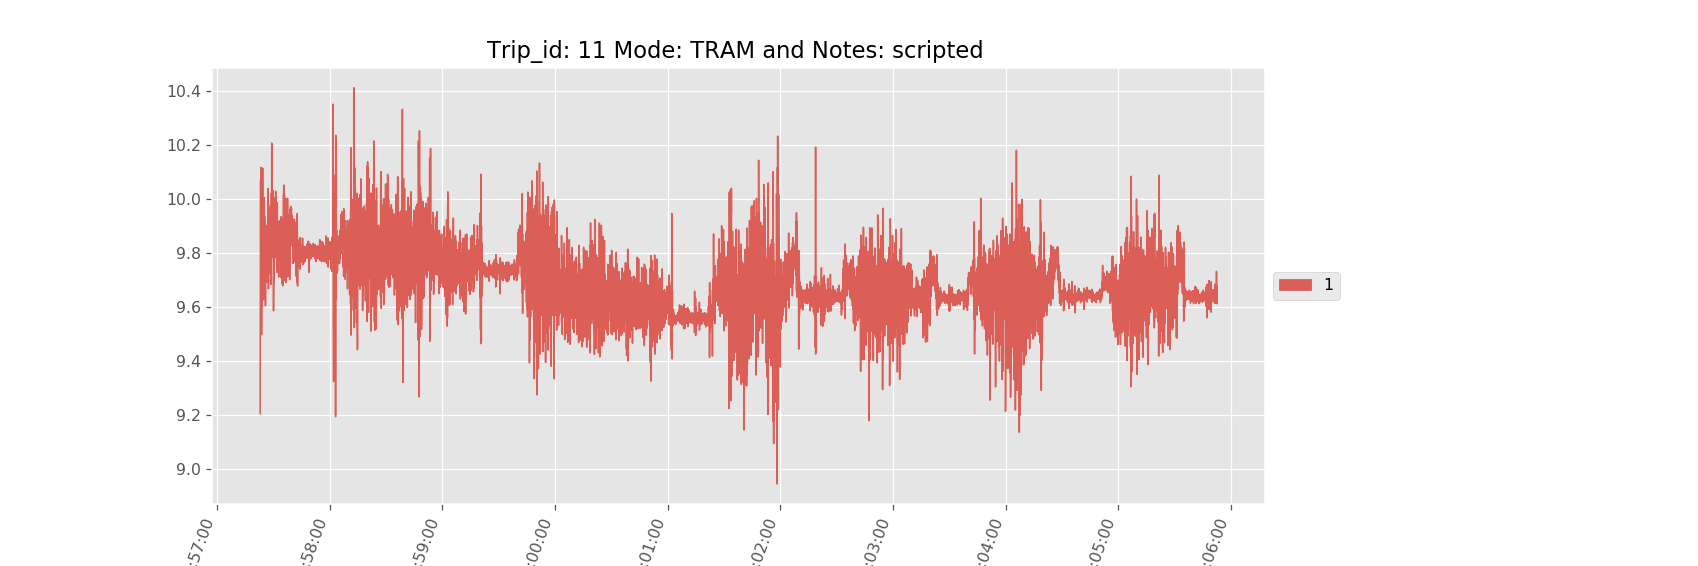

<IPython.core.display.Javascript object>


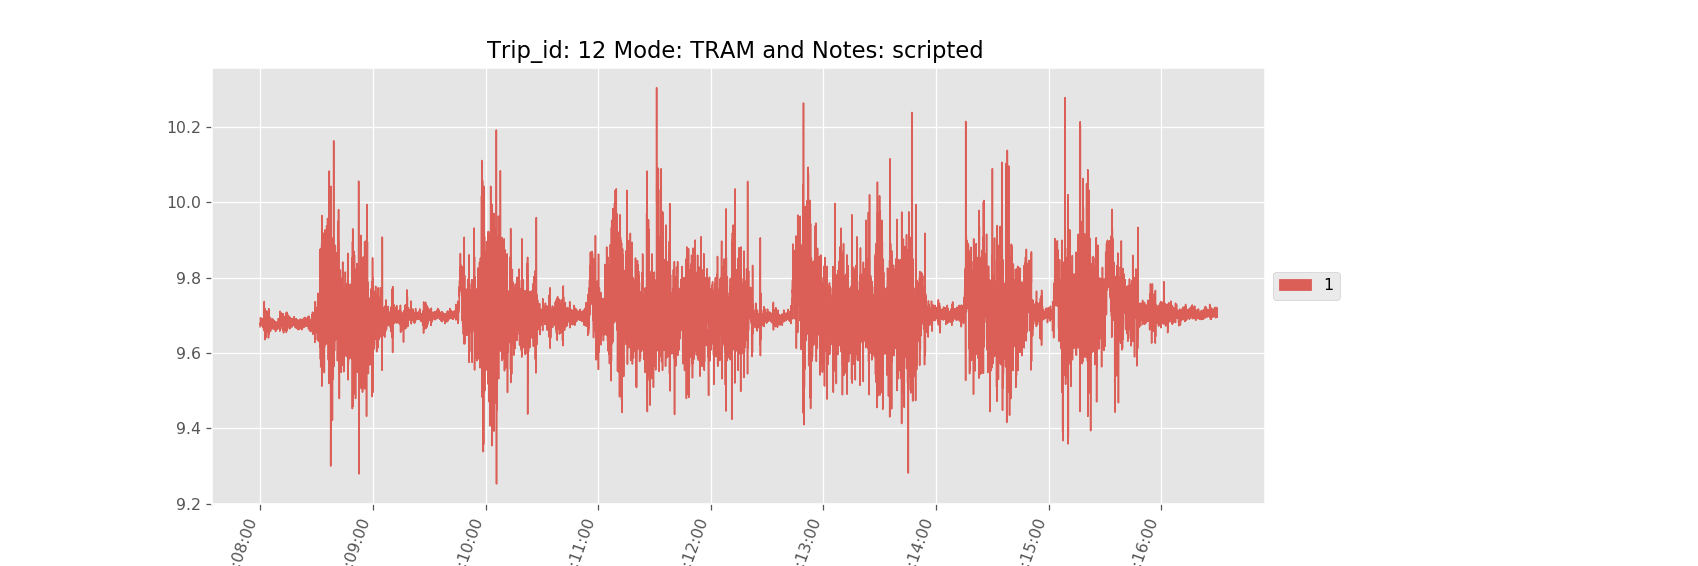

<IPython.core.display.Javascript object>


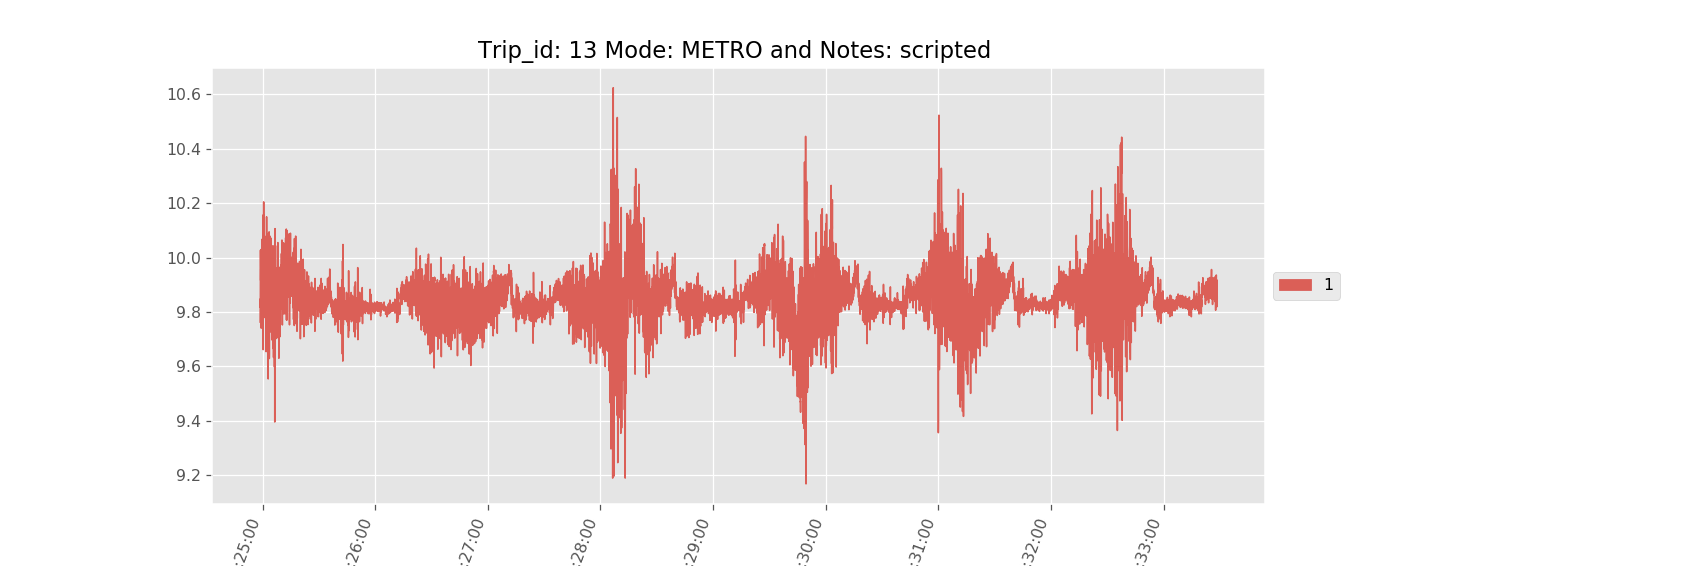

<IPython.core.display.Javascript object>


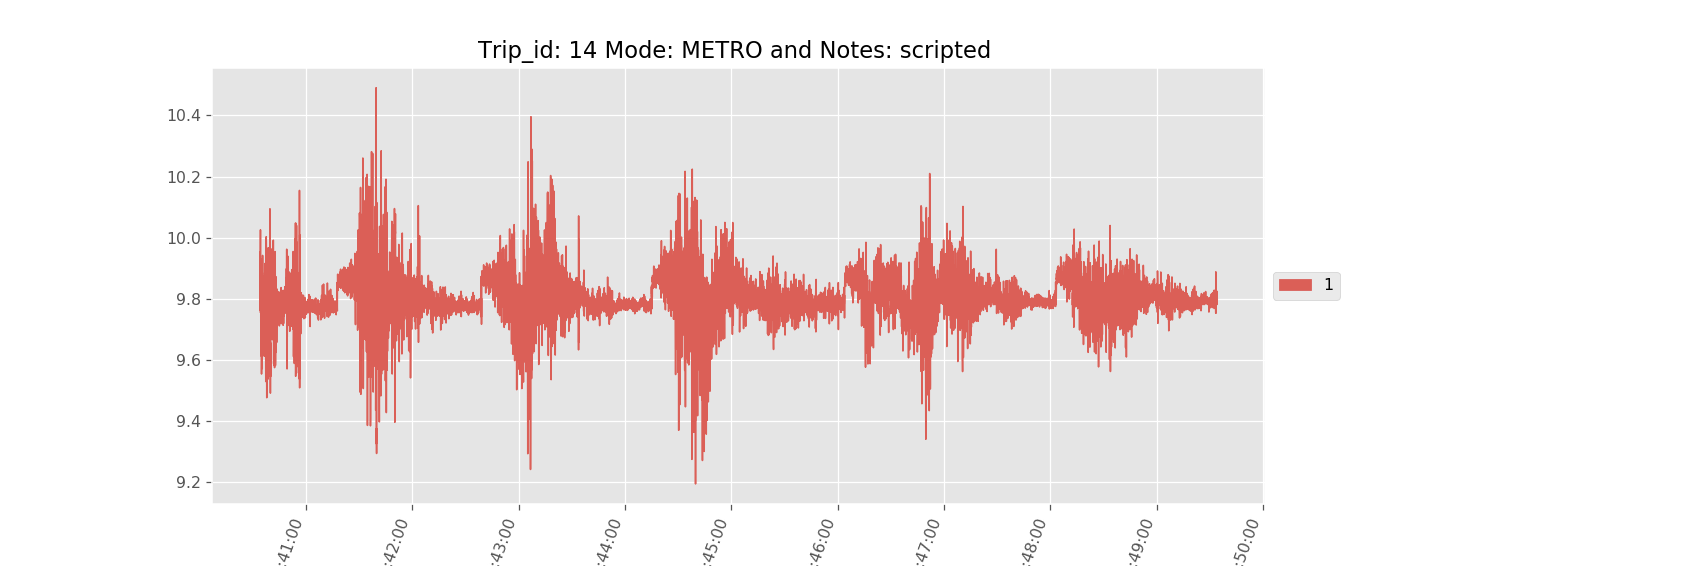

<IPython.core.display.Javascript object>


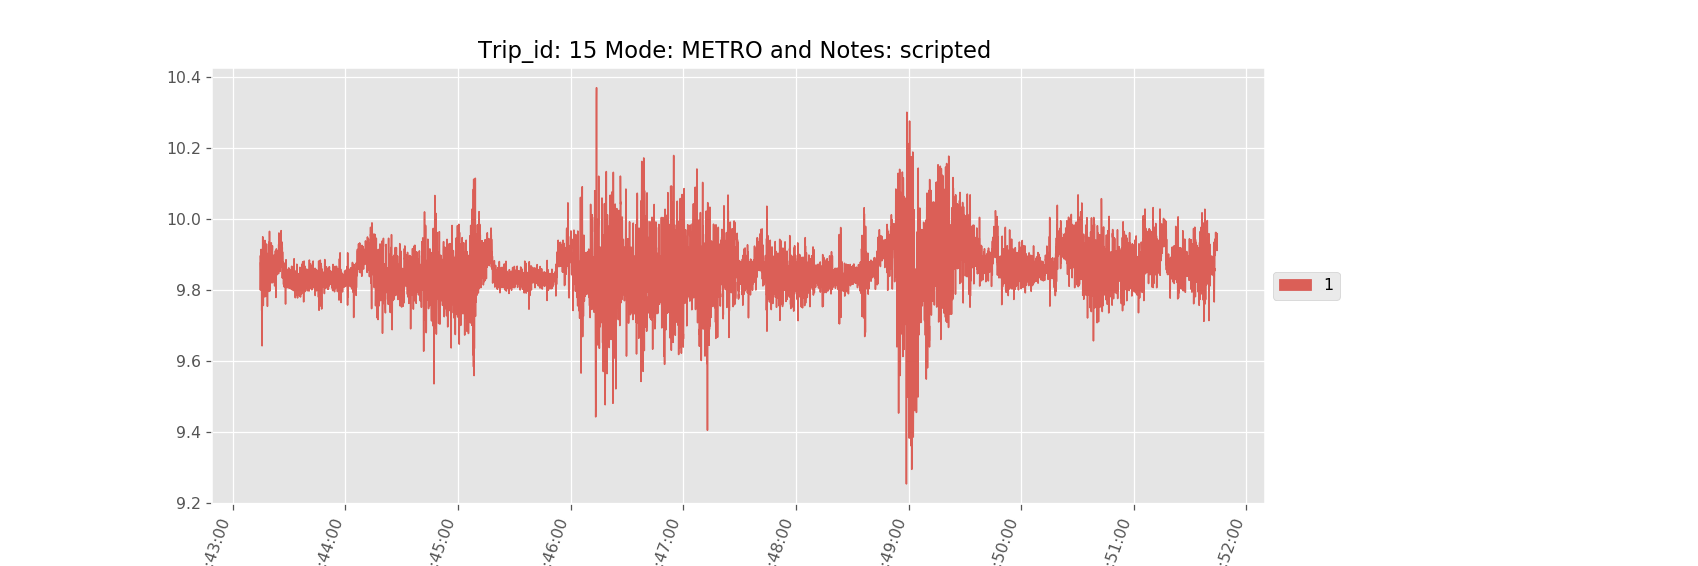

<IPython.core.display.Javascript object>


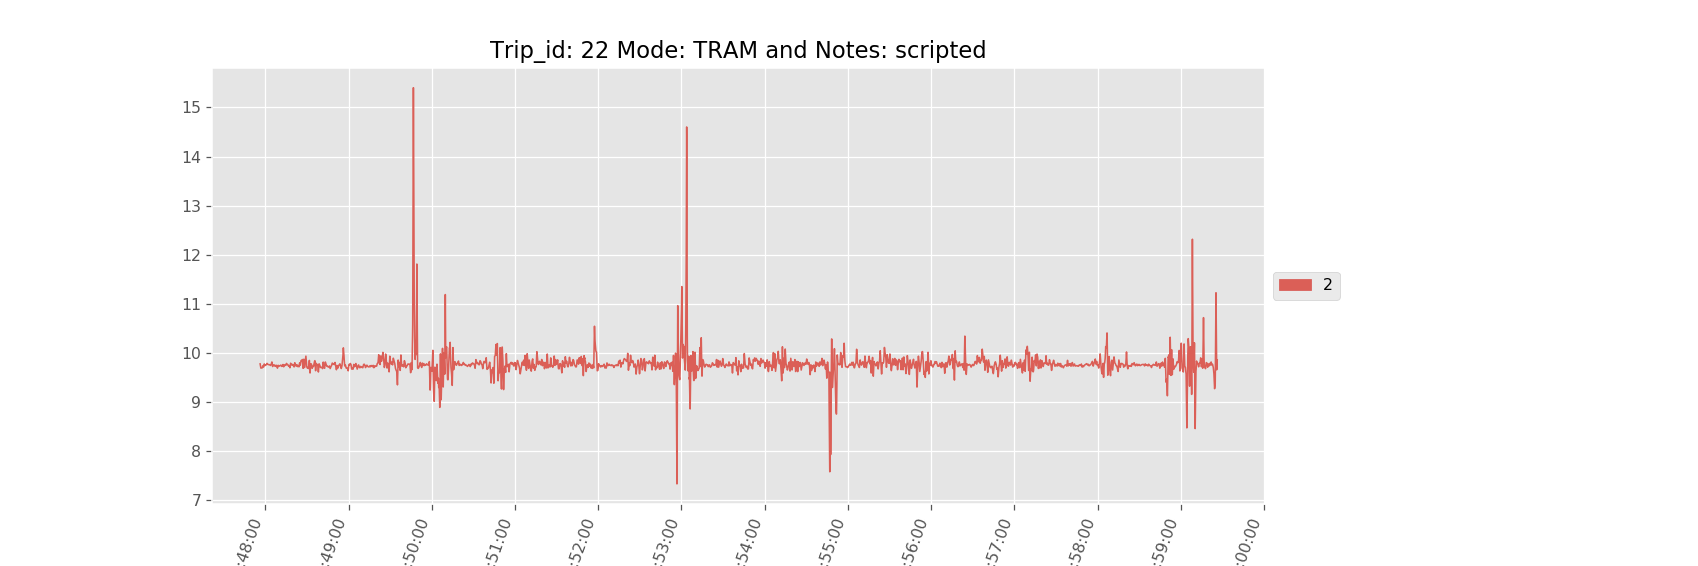

C:\Users\Lukas\.conda\envs\Tensorflow\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


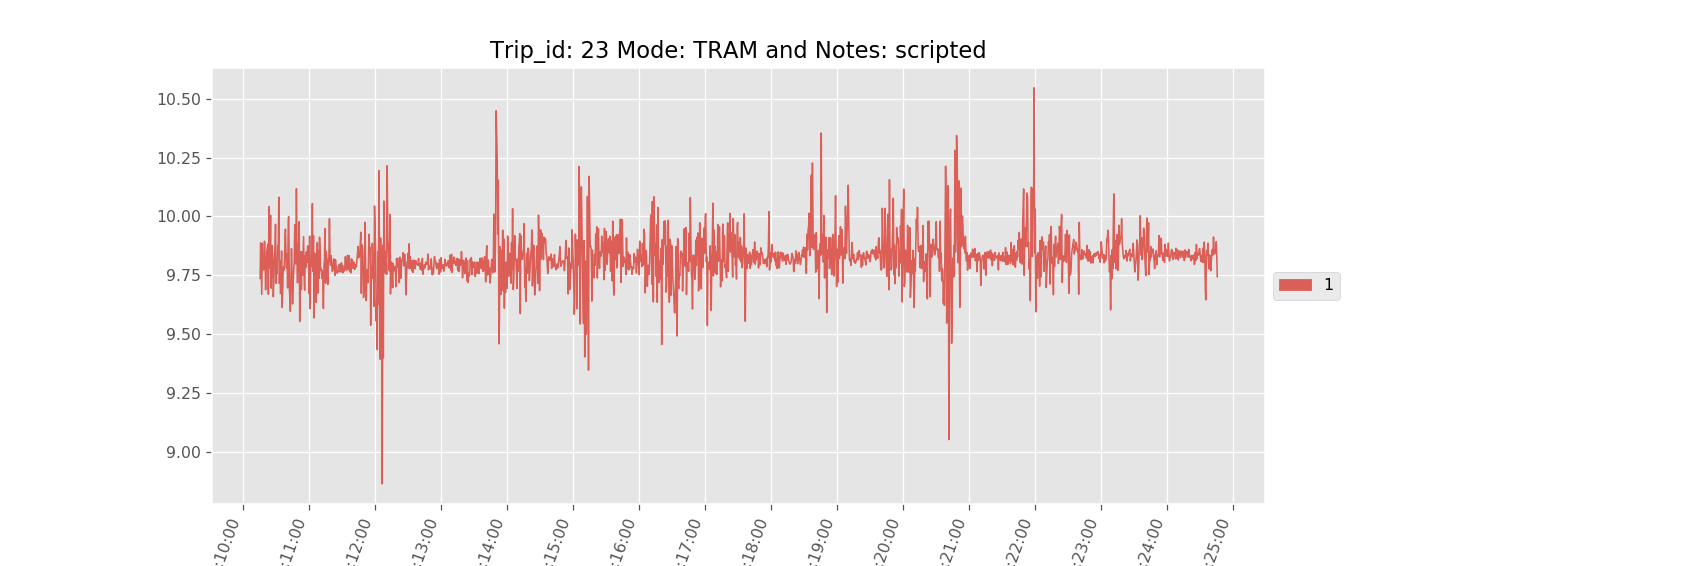

<IPython.core.display.Javascript object>


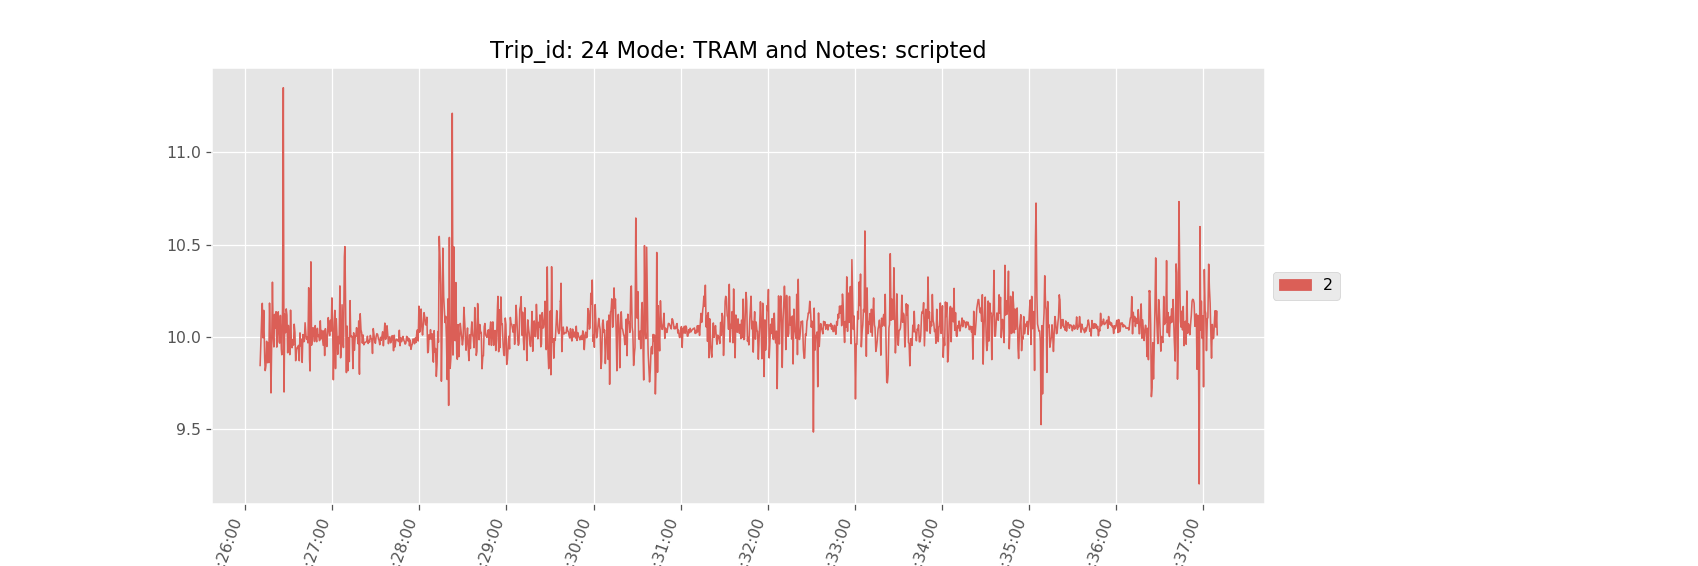

<IPython.core.display.Javascript object>


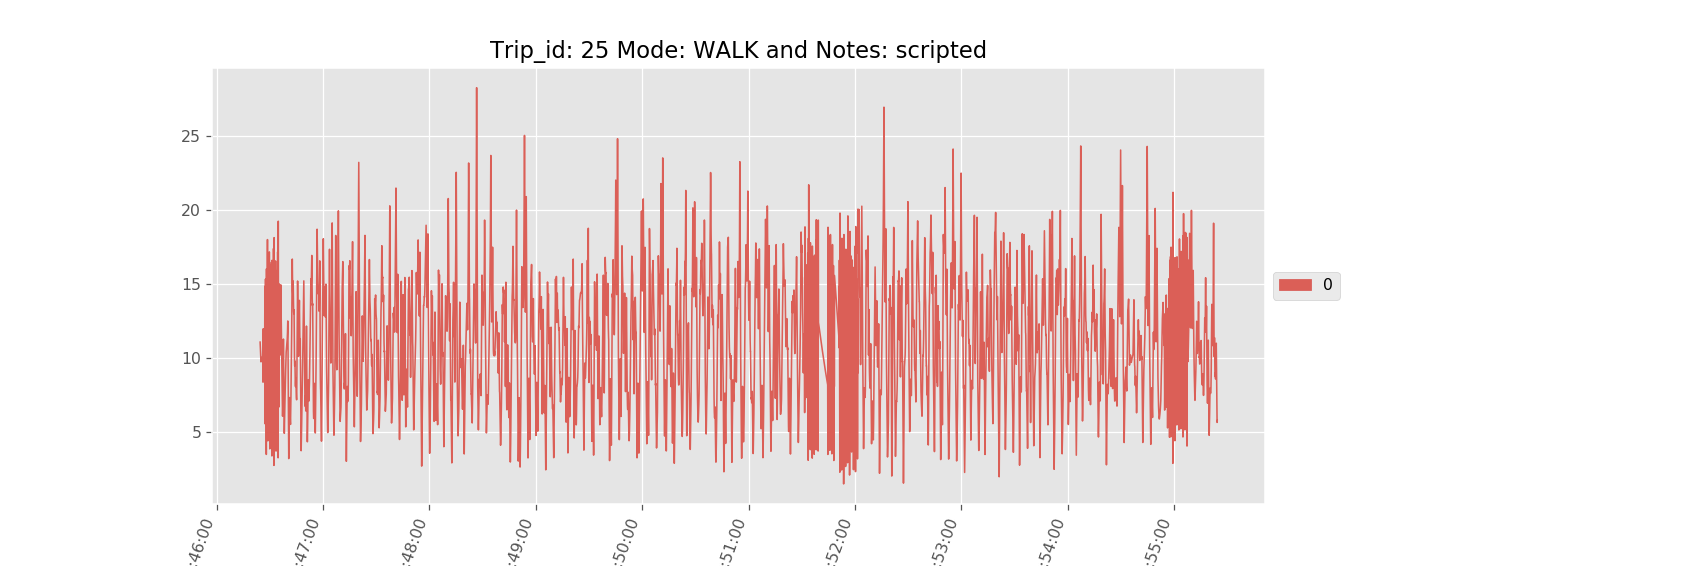

<IPython.core.display.Javascript object>


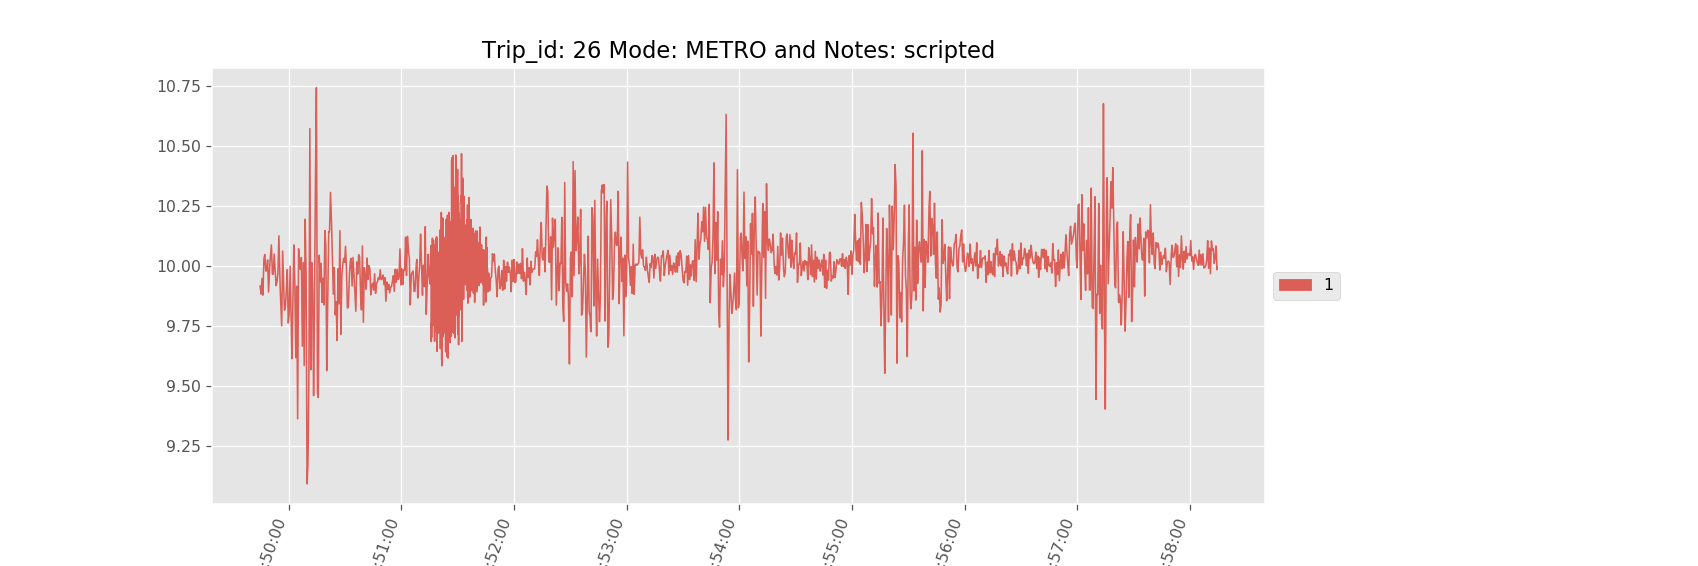

<IPython.core.display.Javascript object>


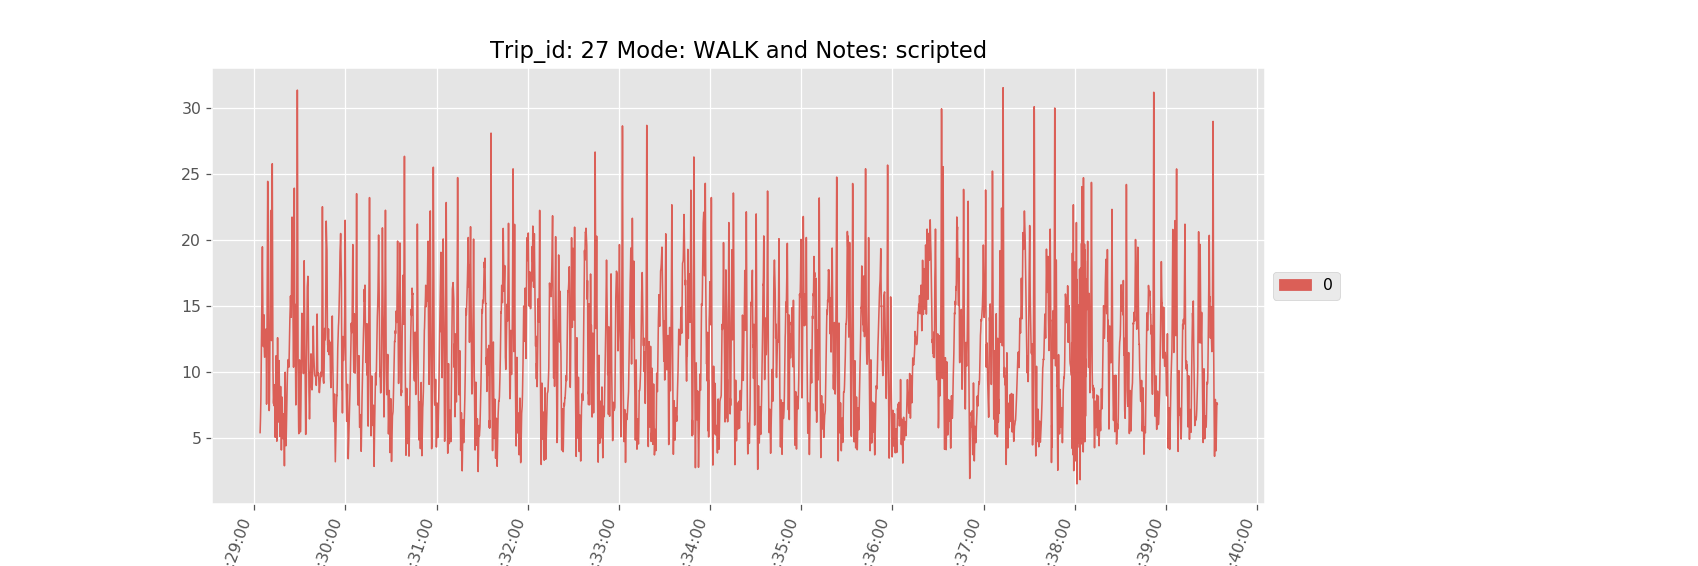

<IPython.core.display.Javascript object>


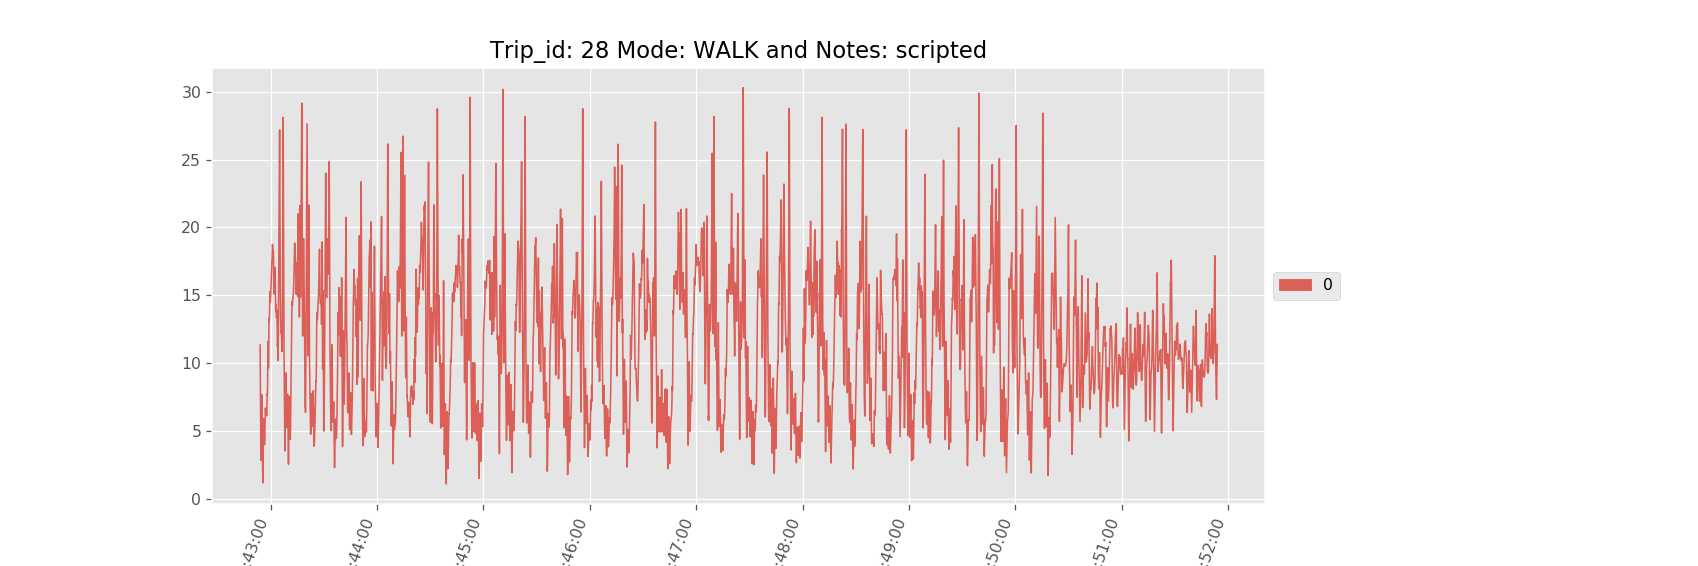

<IPython.core.display.Javascript object>


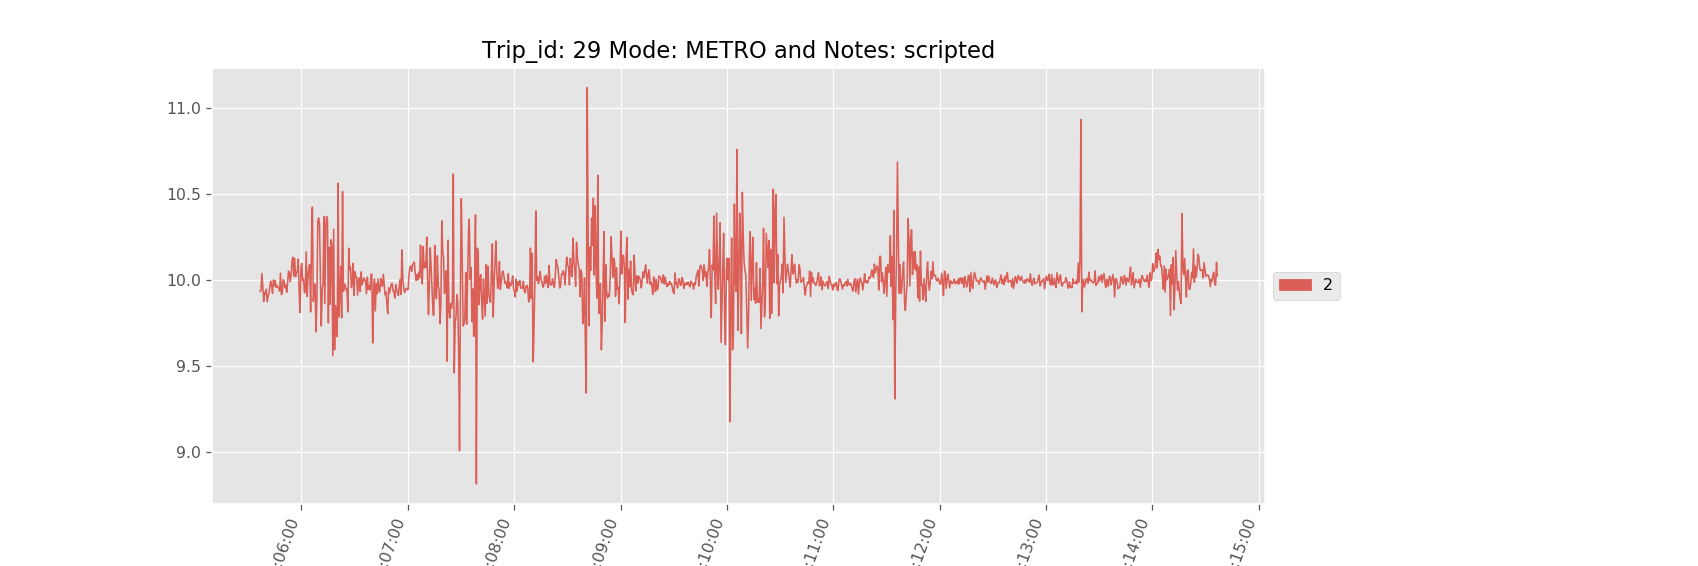

<IPython.core.display.Javascript object>


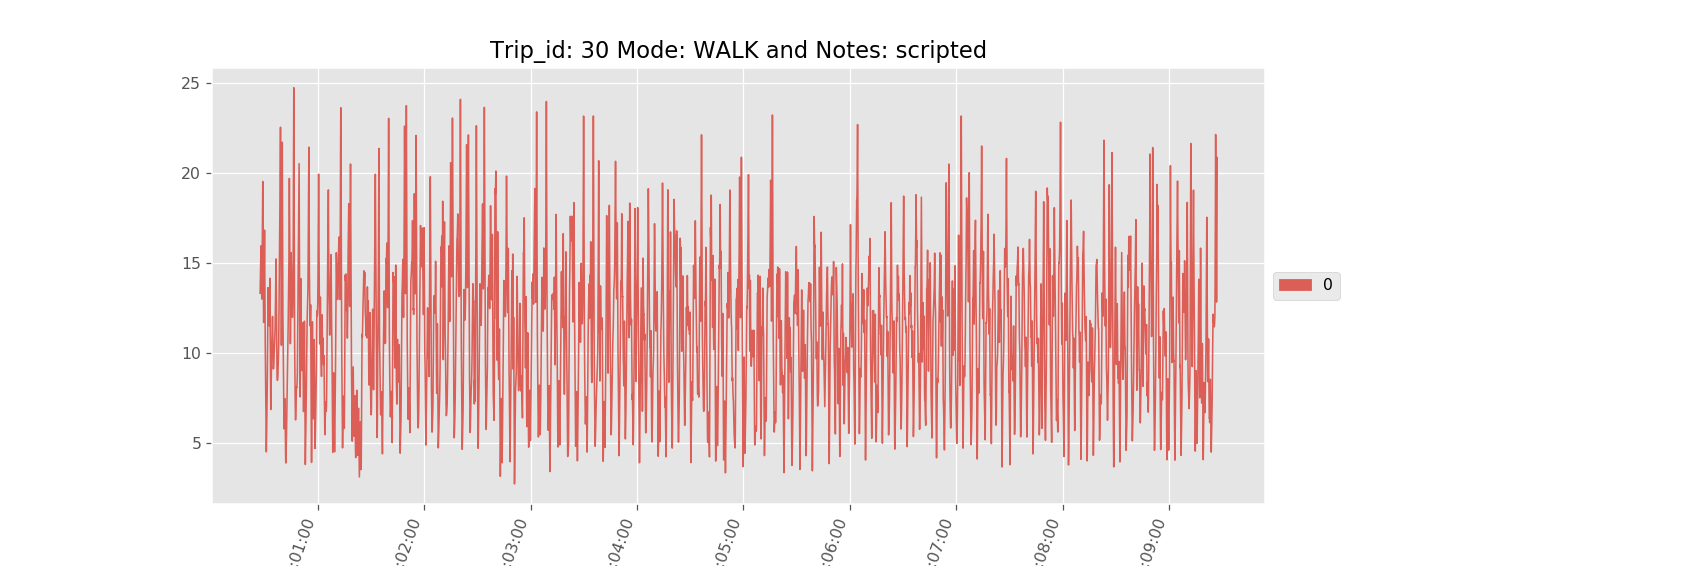

<IPython.core.display.Javascript object>


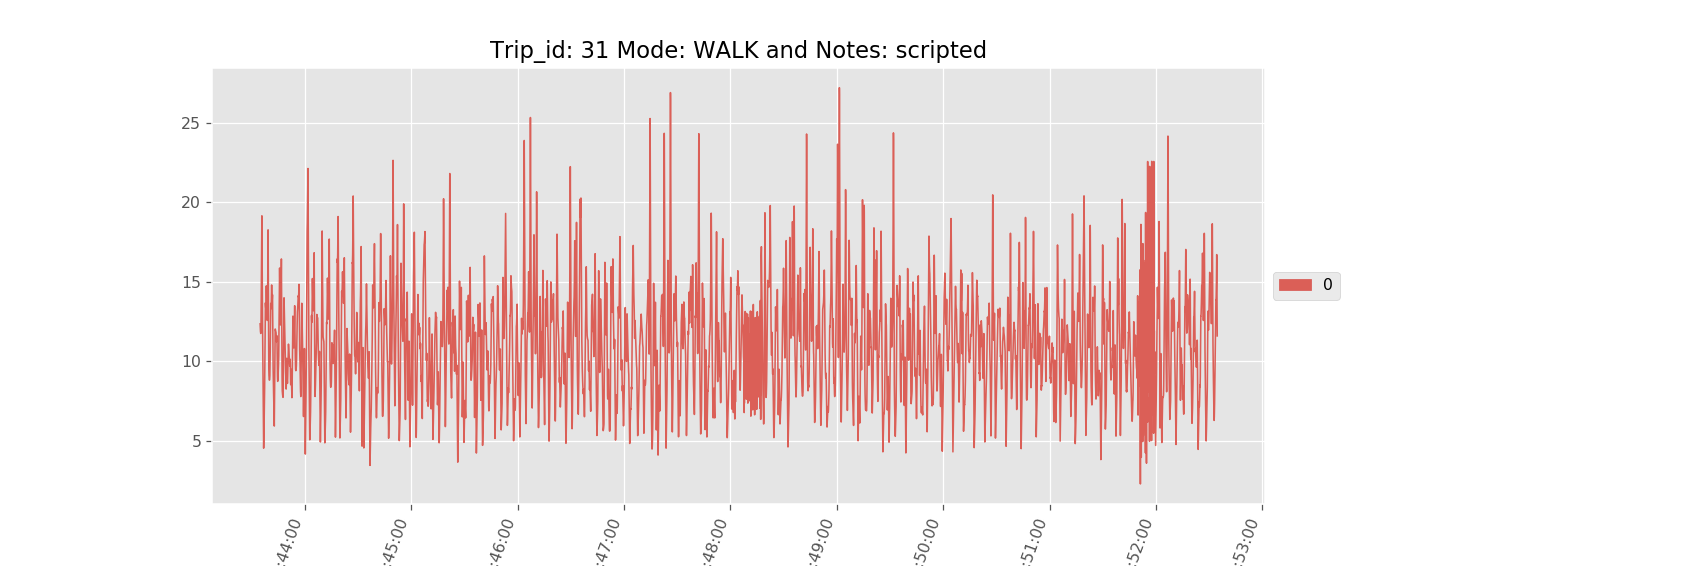

<IPython.core.display.Javascript object>


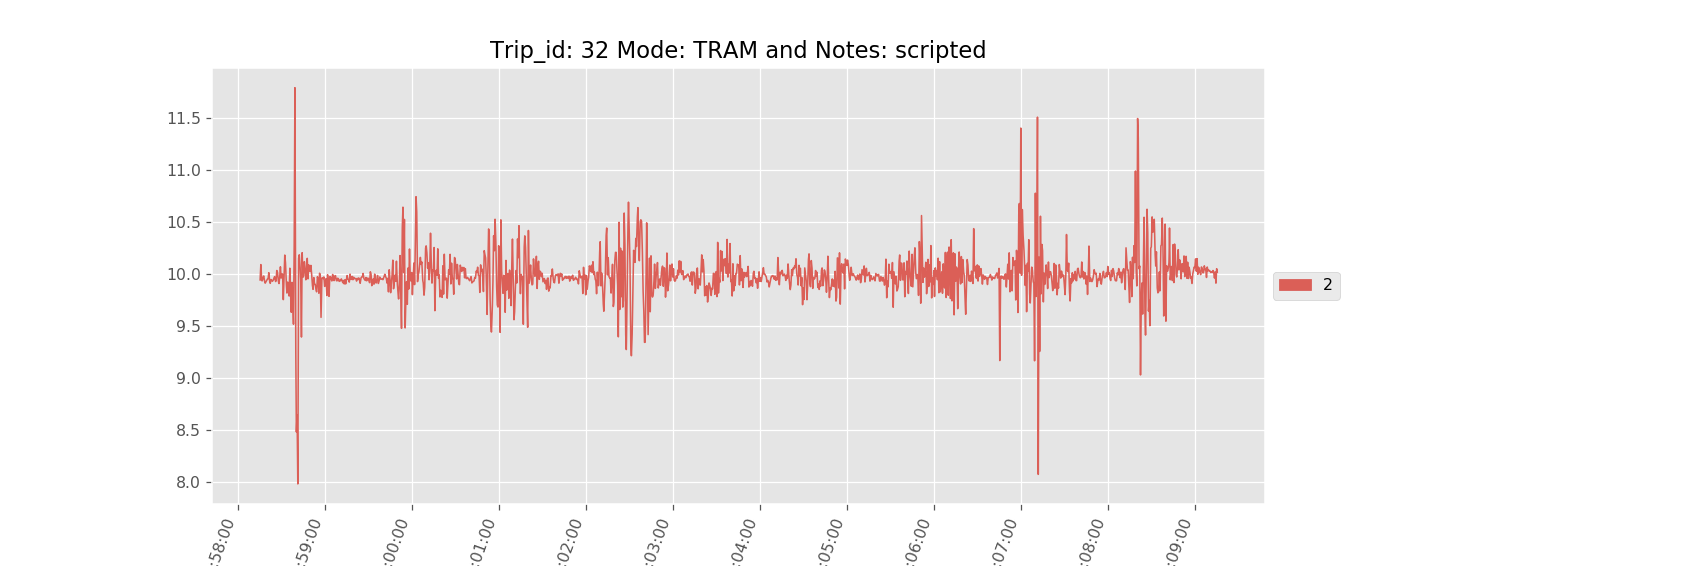

<IPython.core.display.Javascript object>


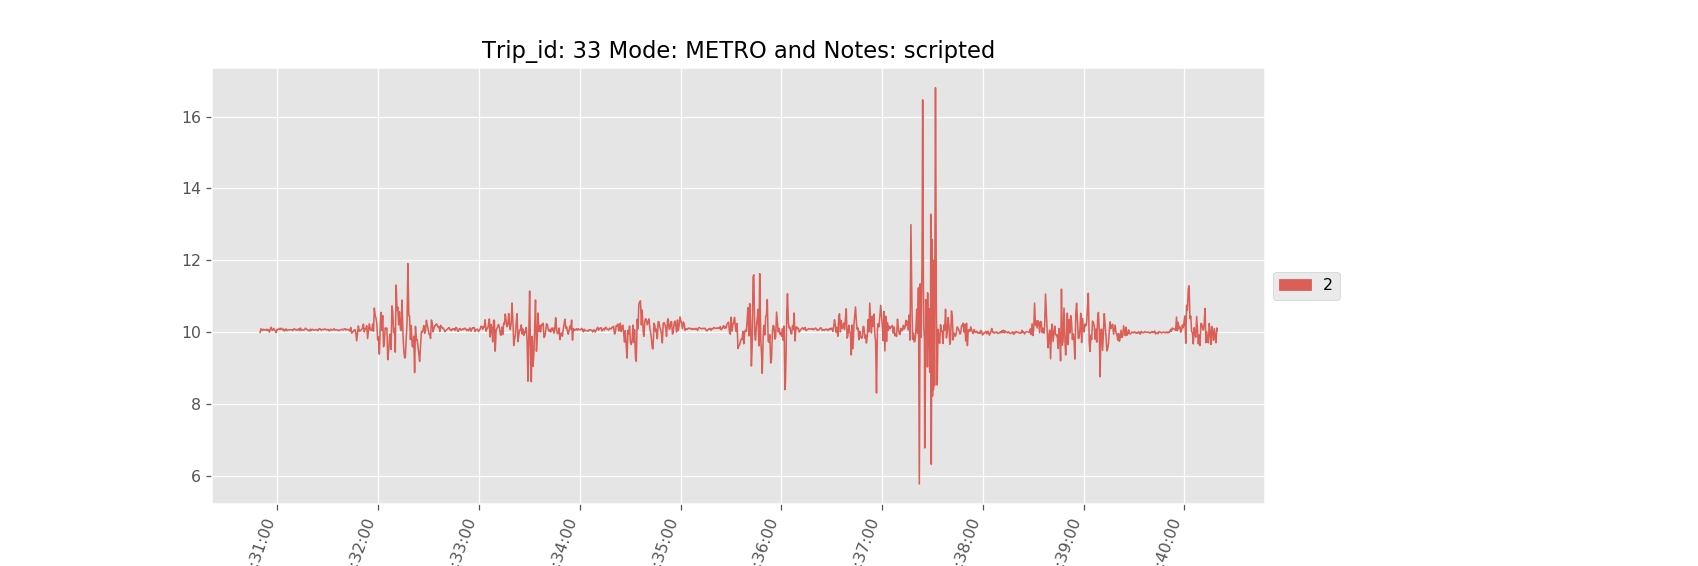

<IPython.core.display.Javascript object>


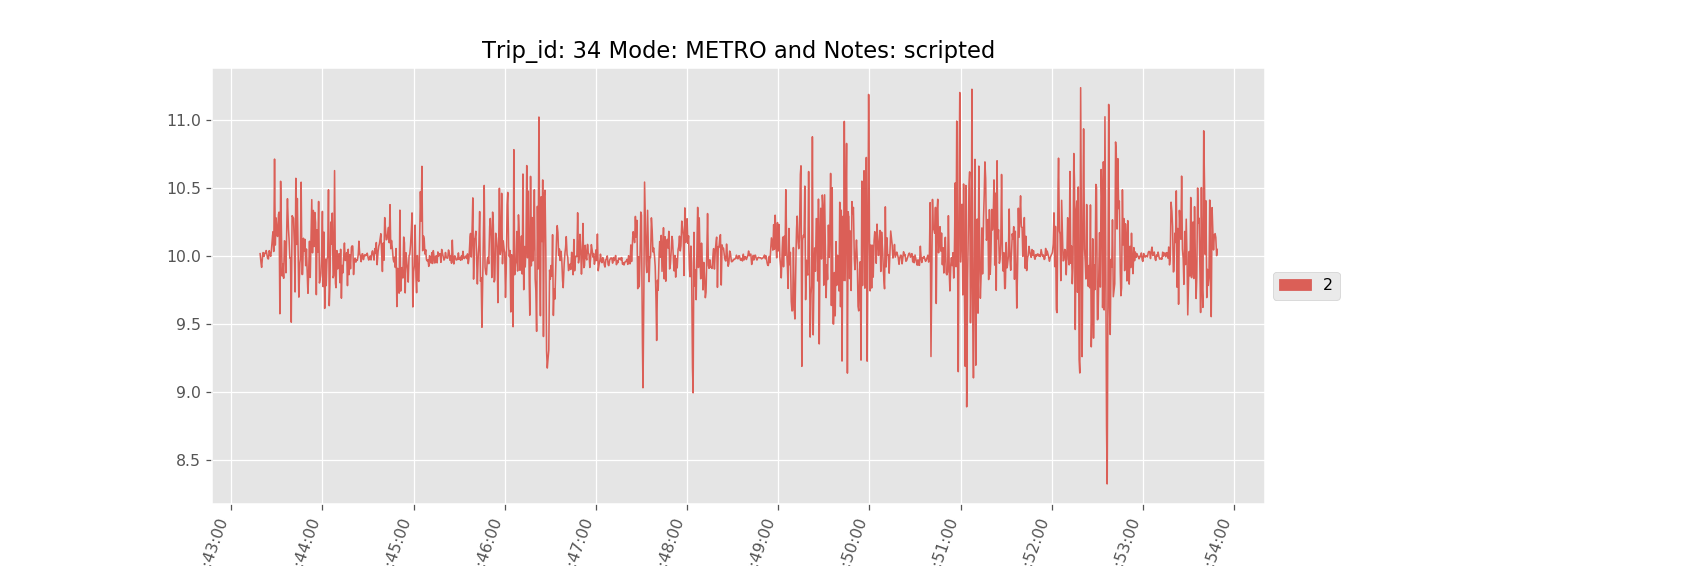

<IPython.core.display.Javascript object>


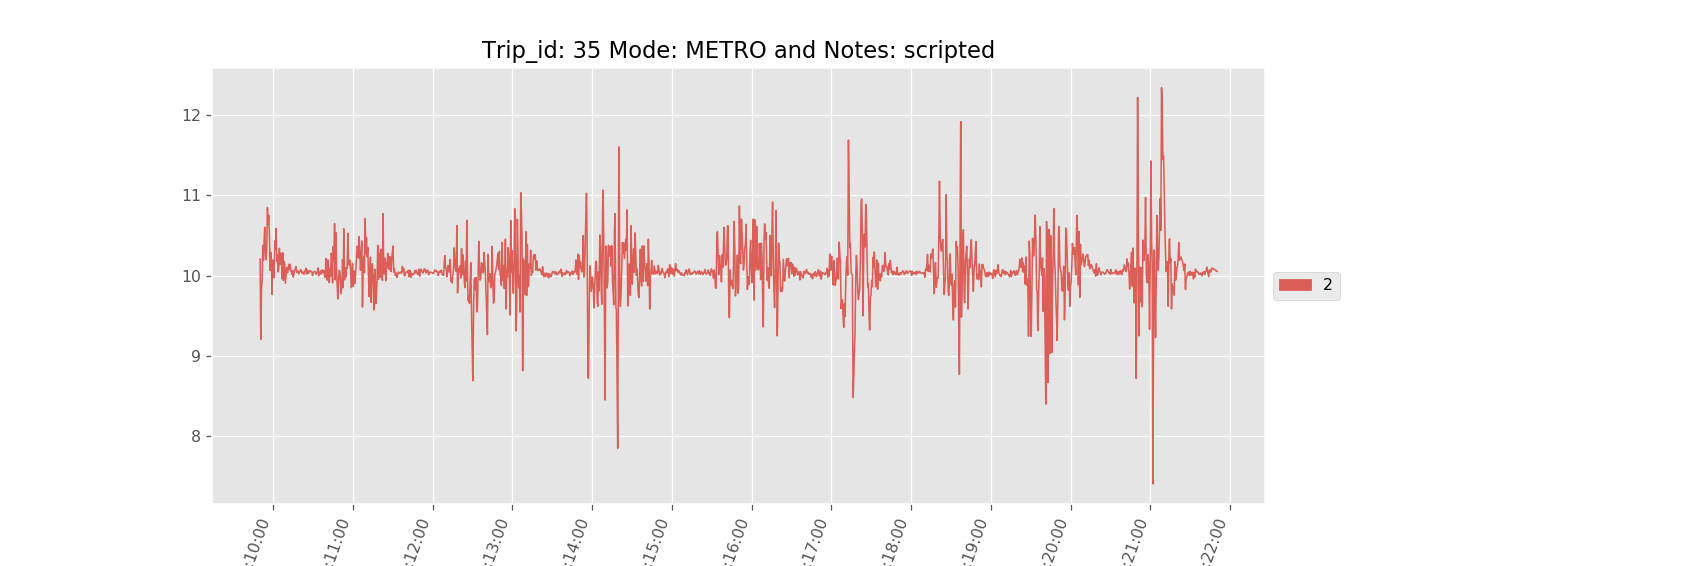

<IPython.core.display.Javascript object>


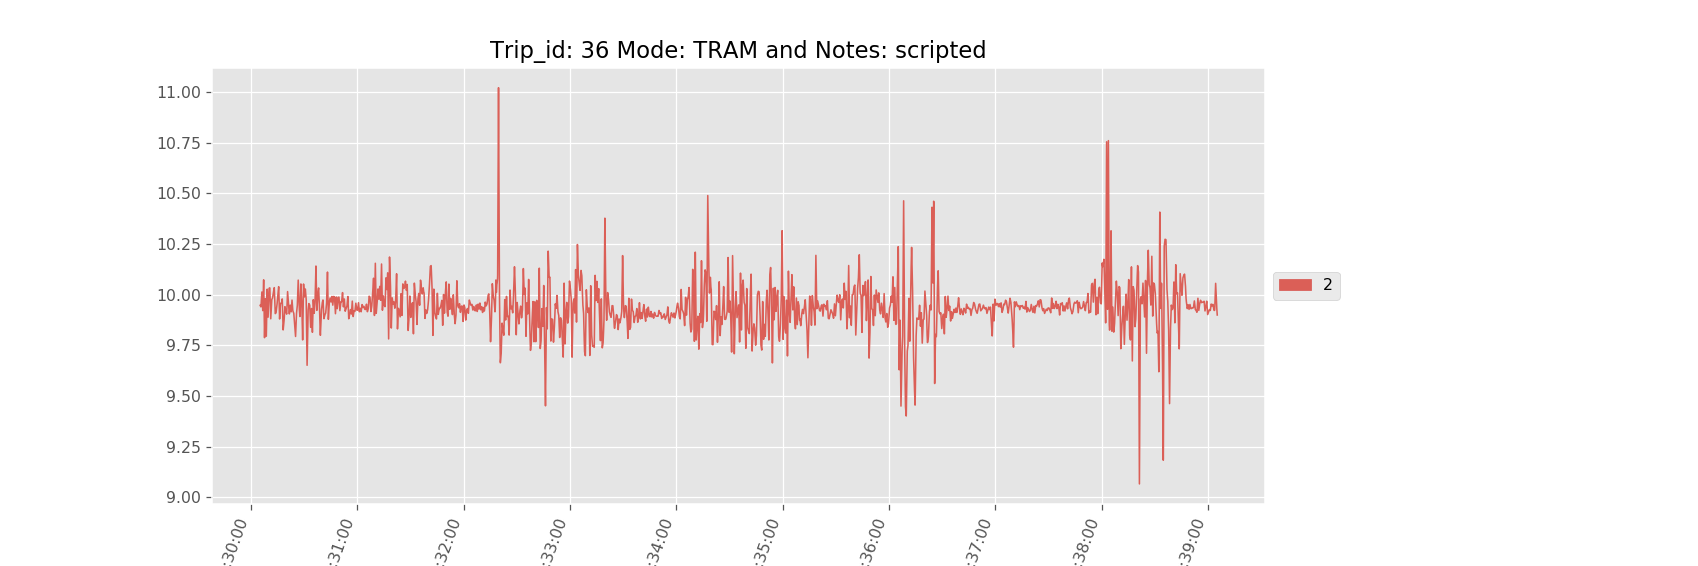

<IPython.core.display.Javascript object>


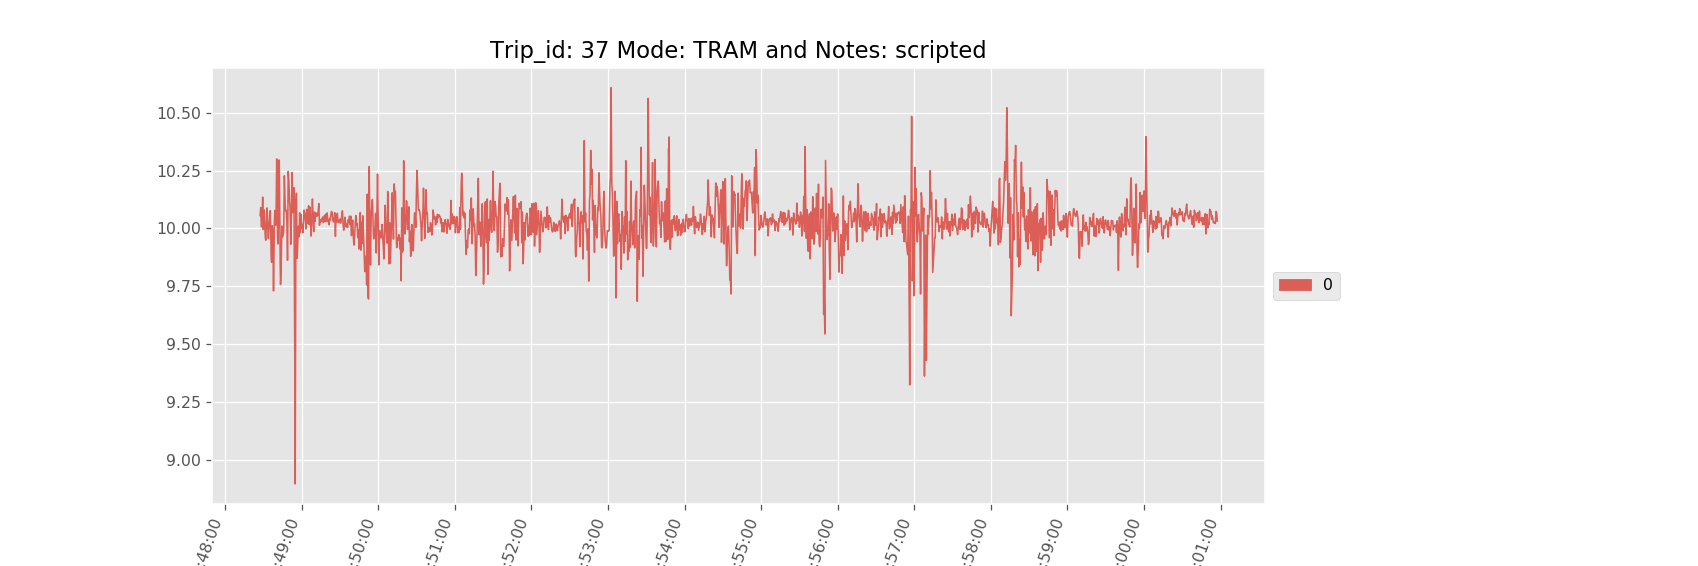

<IPython.core.display.Javascript object>


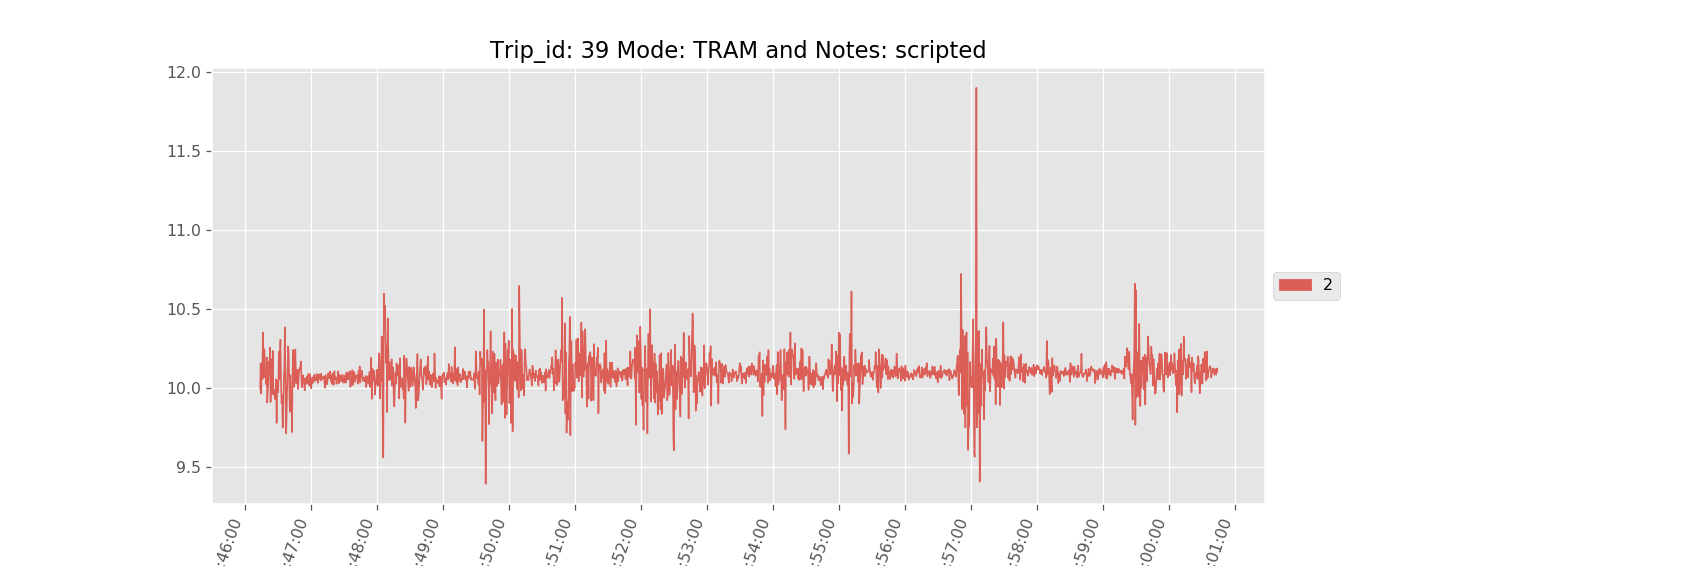

<IPython.core.display.Javascript object>


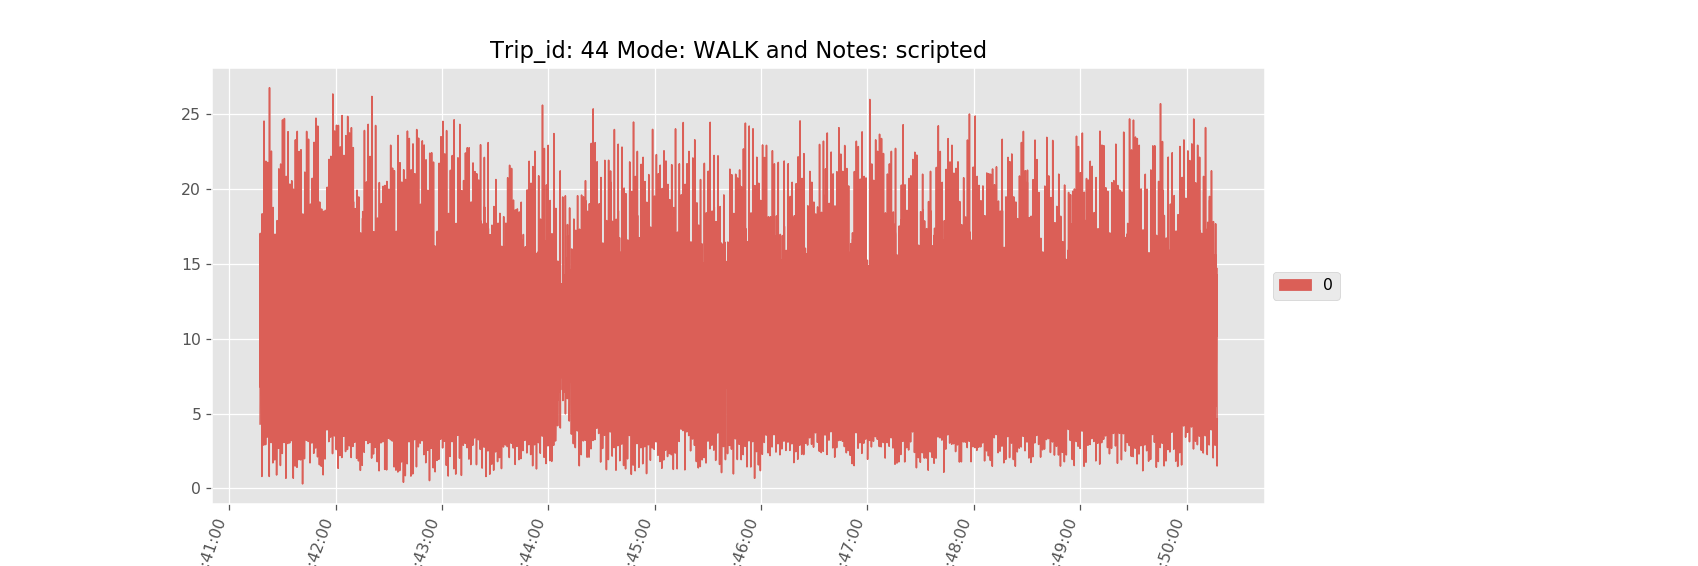

<IPython.core.display.Javascript object>


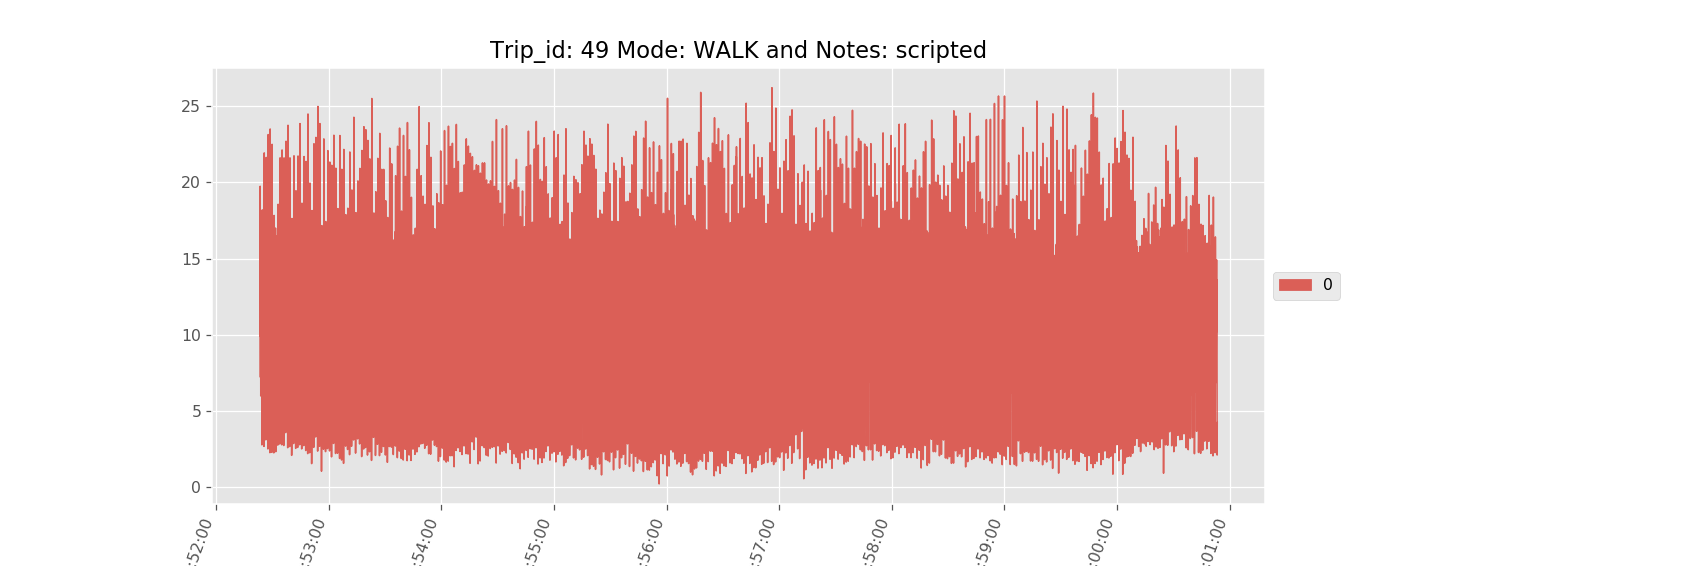

<IPython.core.display.Javascript object>


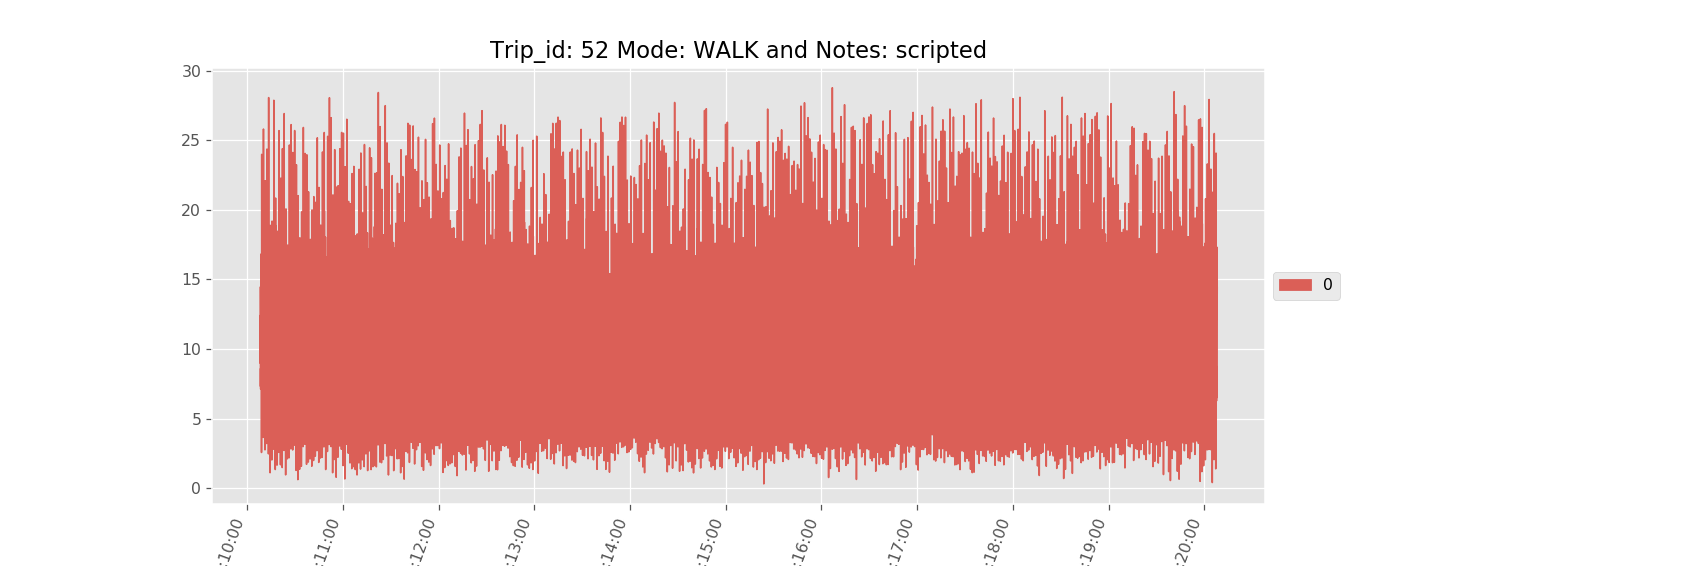

<IPython.core.display.Javascript object>


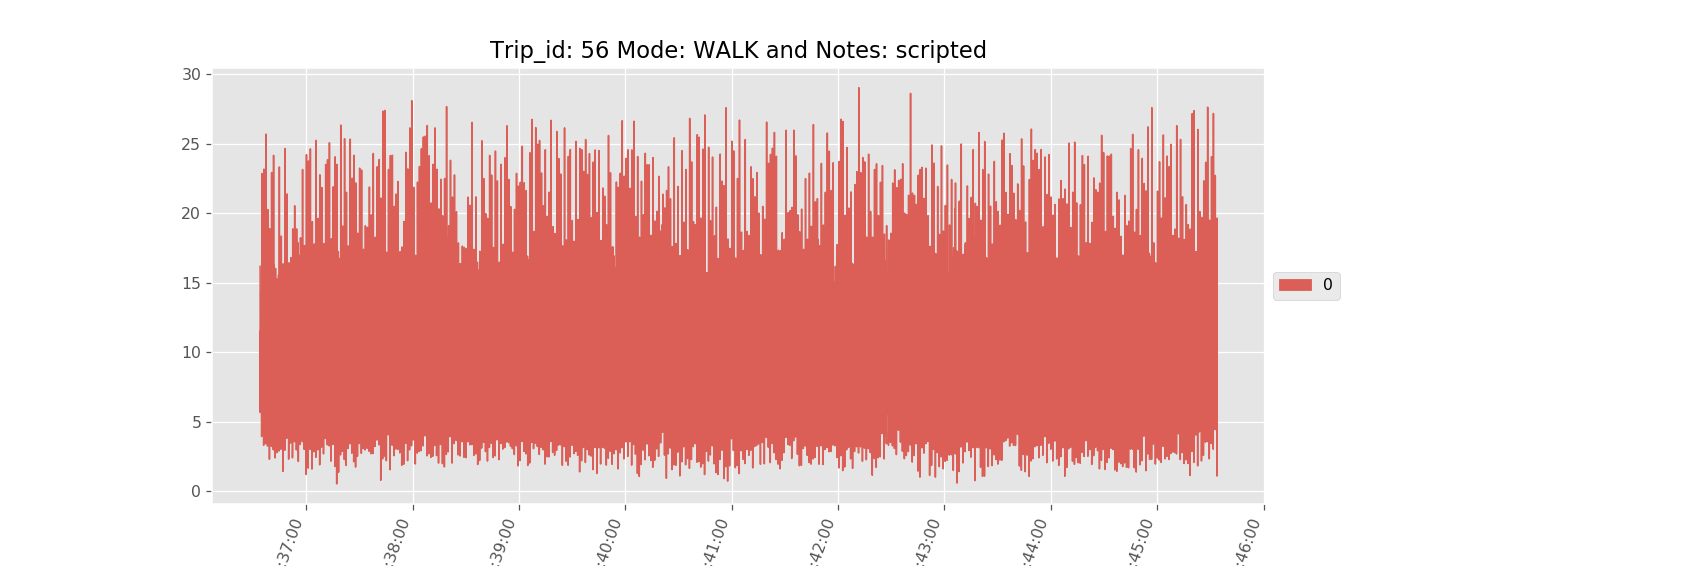

<IPython.core.display.Javascript object>


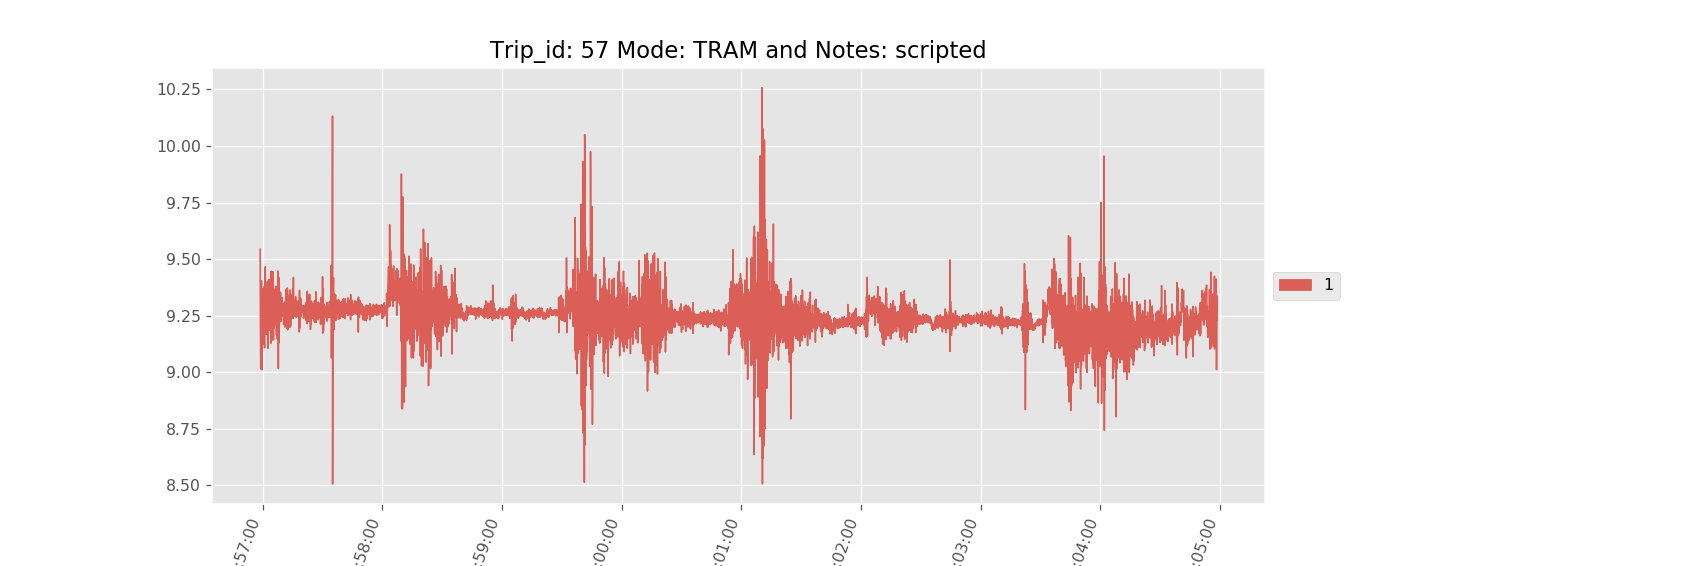

<IPython.core.display.Javascript object>


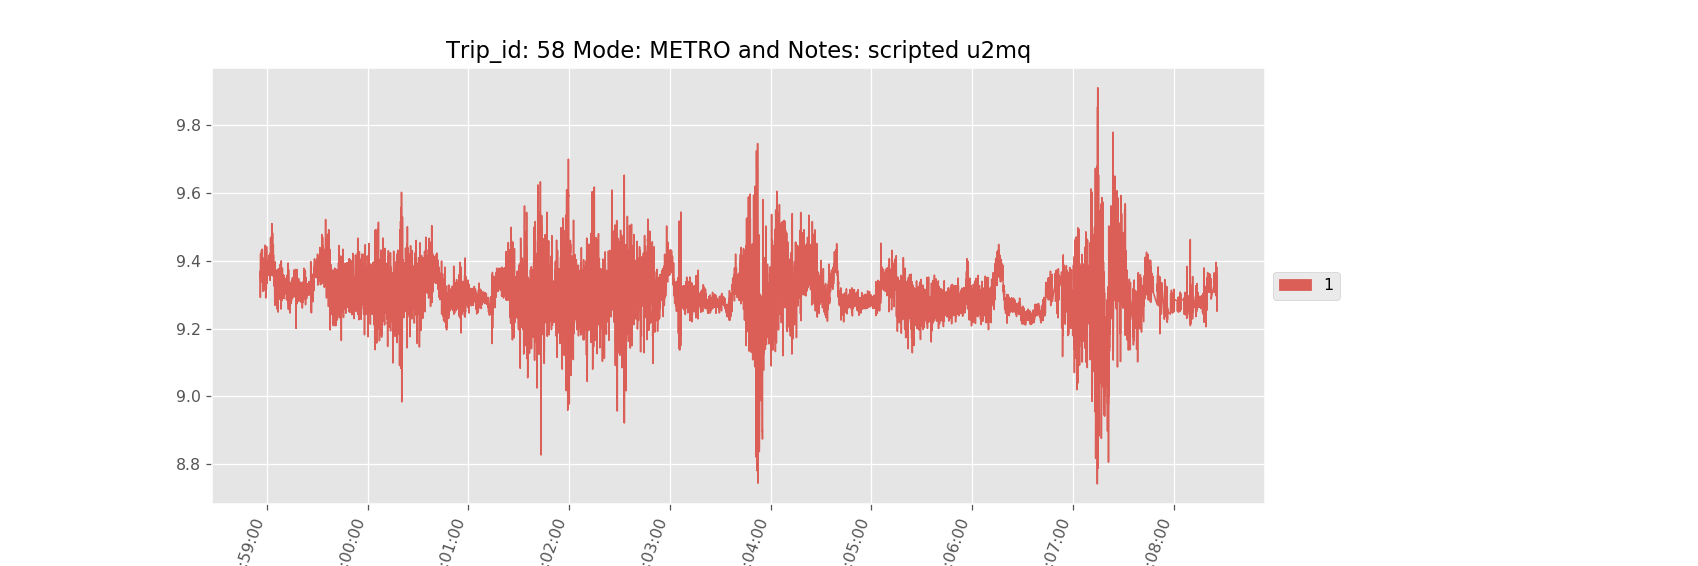

<IPython.core.display.Javascript object>


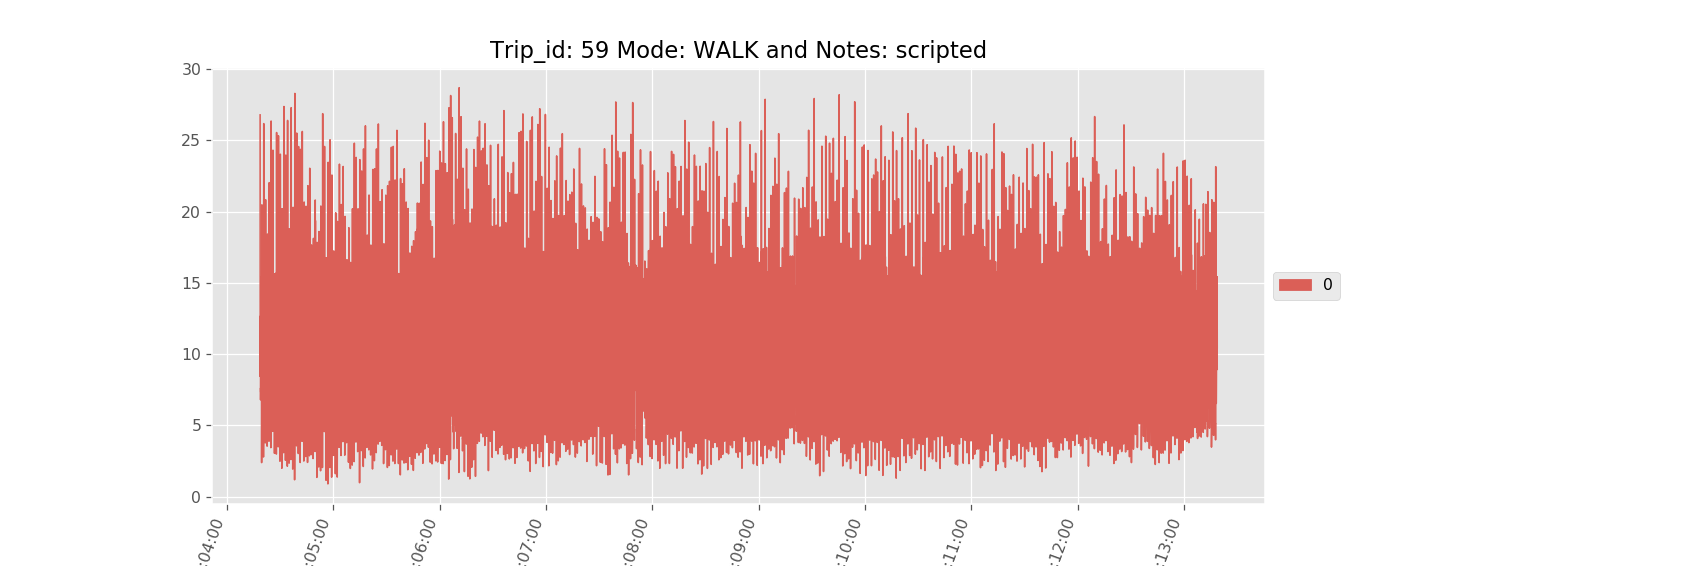

<IPython.core.display.Javascript object>


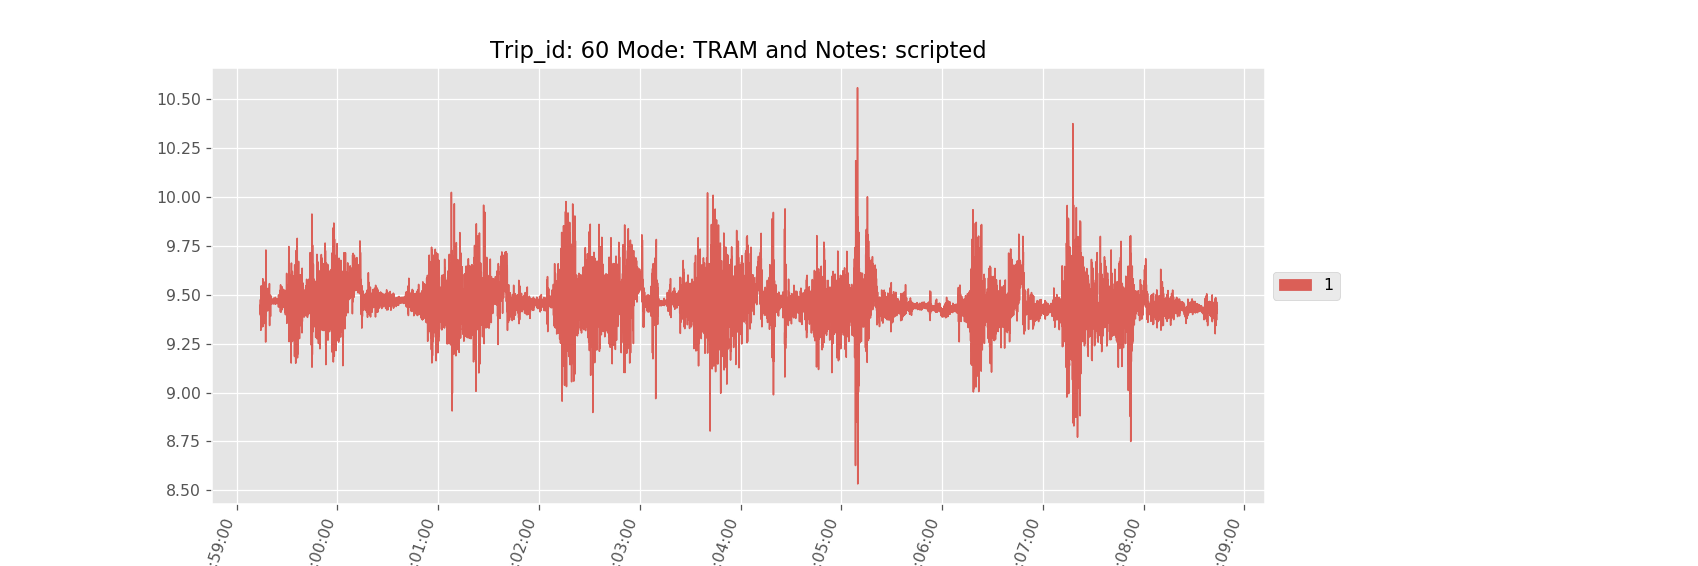

<IPython.core.display.Javascript object>


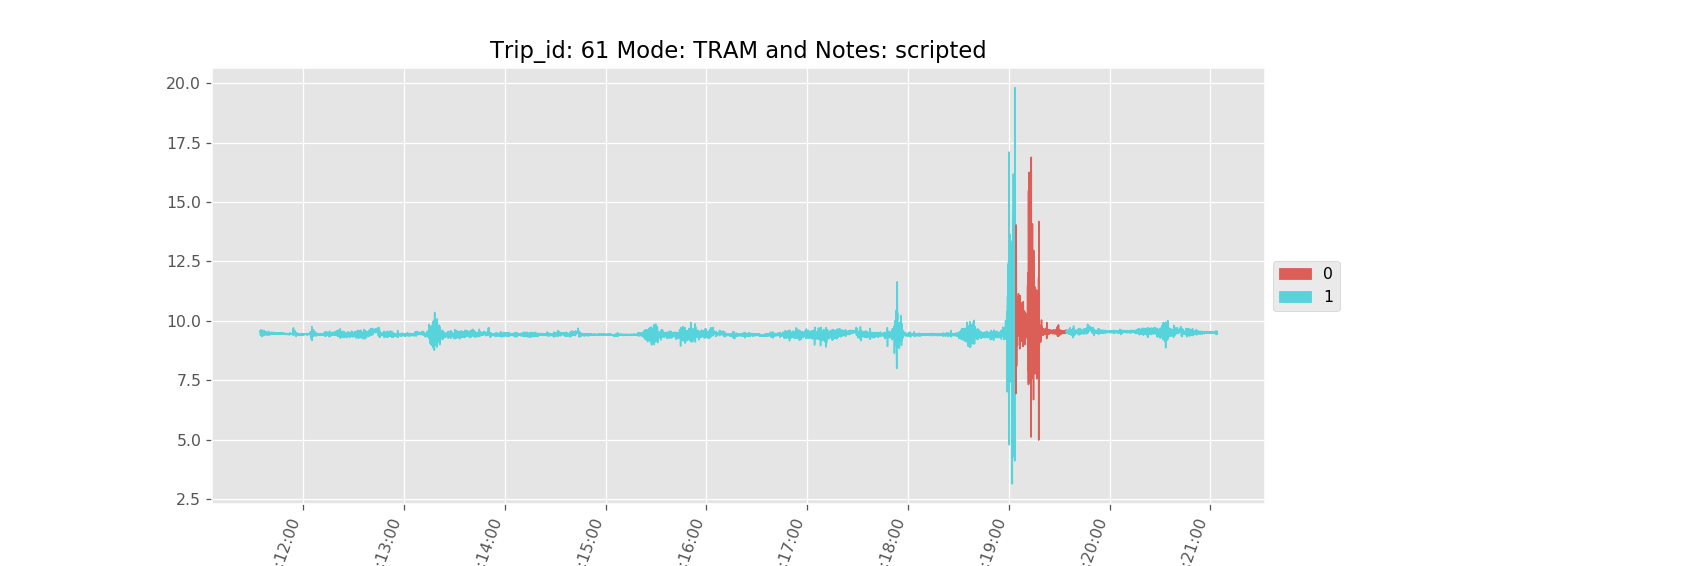

<IPython.core.display.Javascript object>


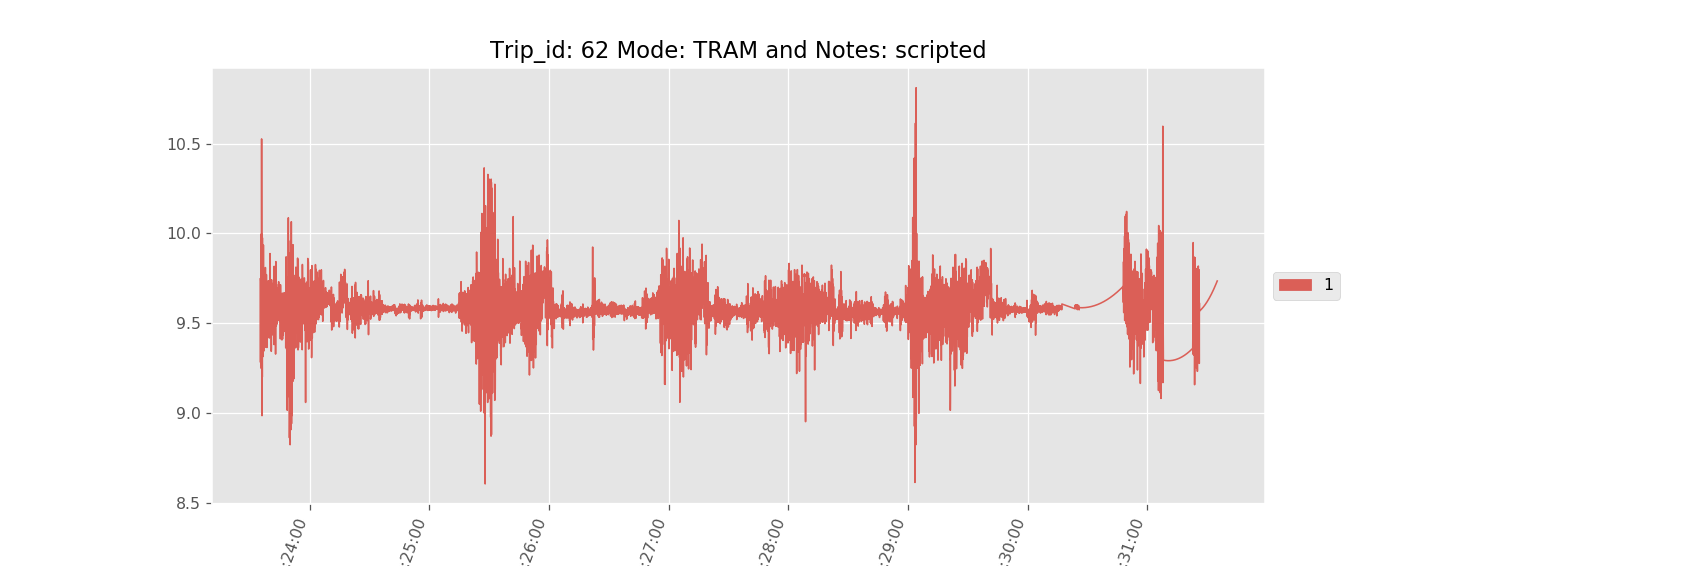

<IPython.core.display.Javascript object>


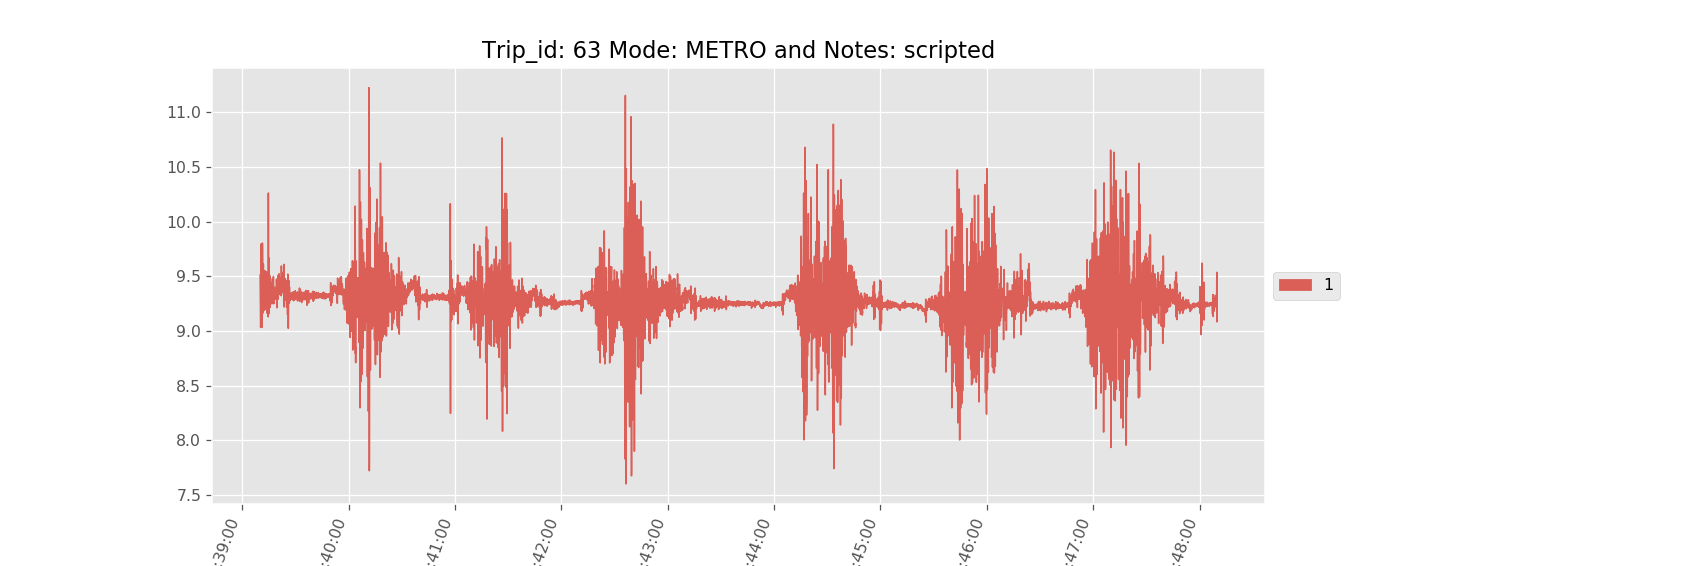

<IPython.core.display.Javascript object>


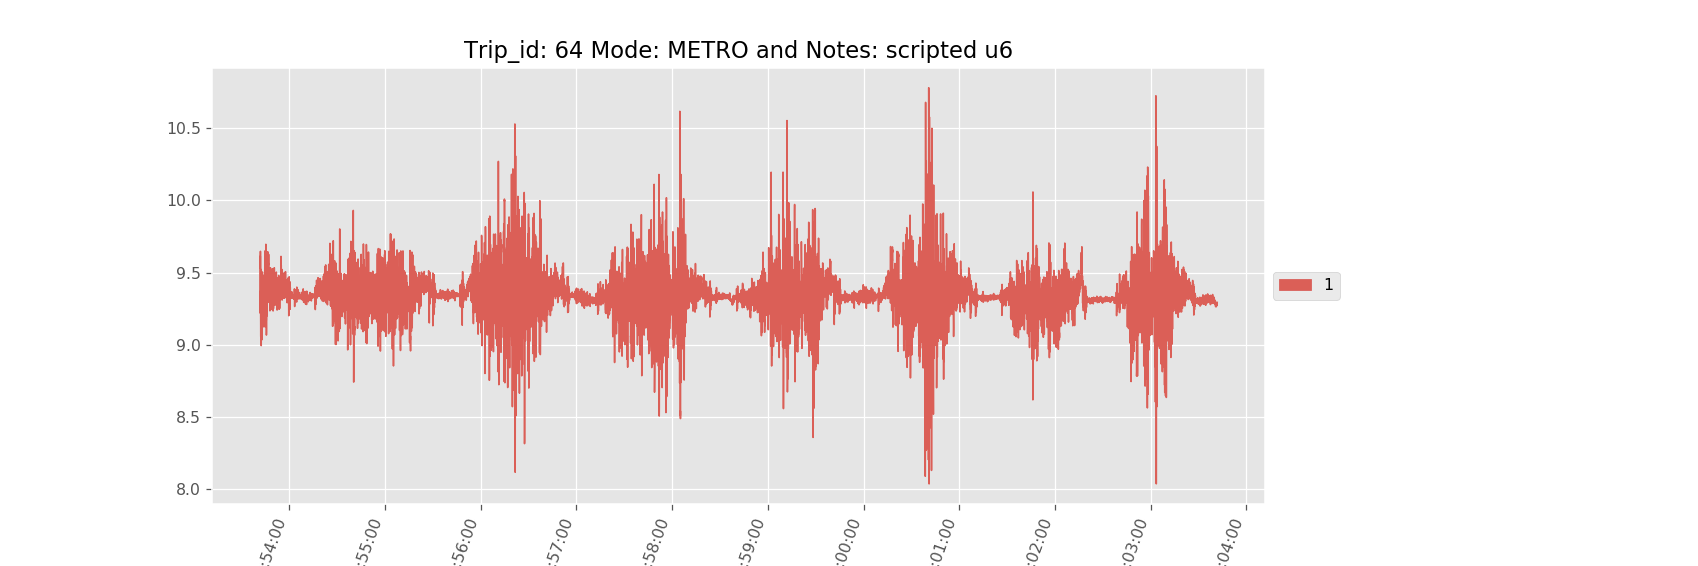

<IPython.core.display.Javascript object>


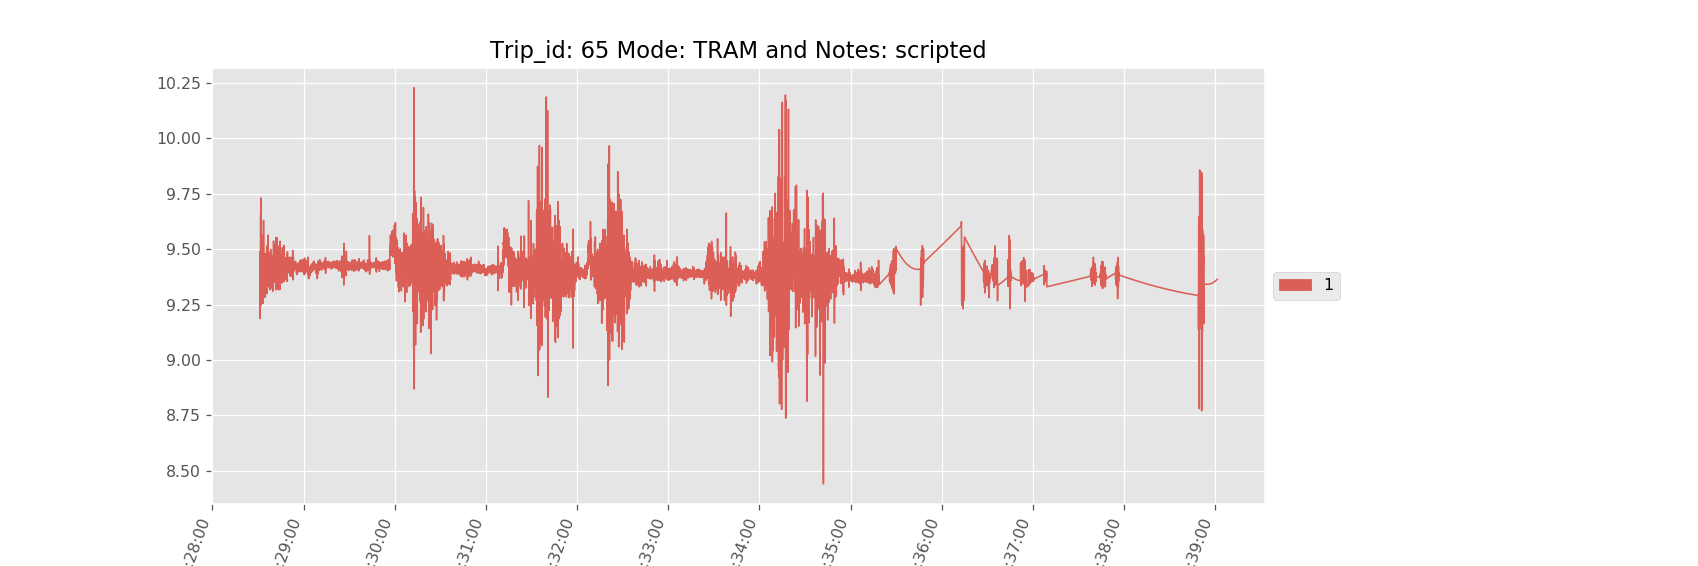

<IPython.core.display.Javascript object>


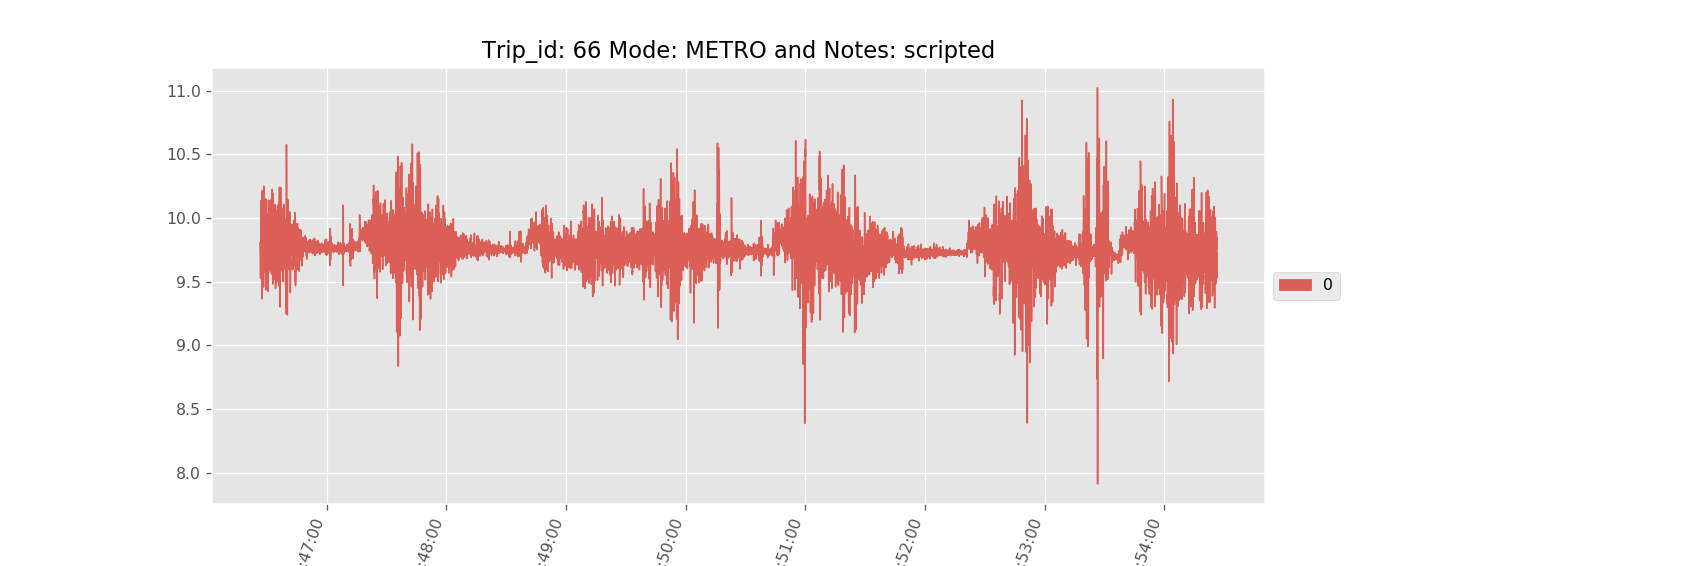

<IPython.core.display.Javascript object>


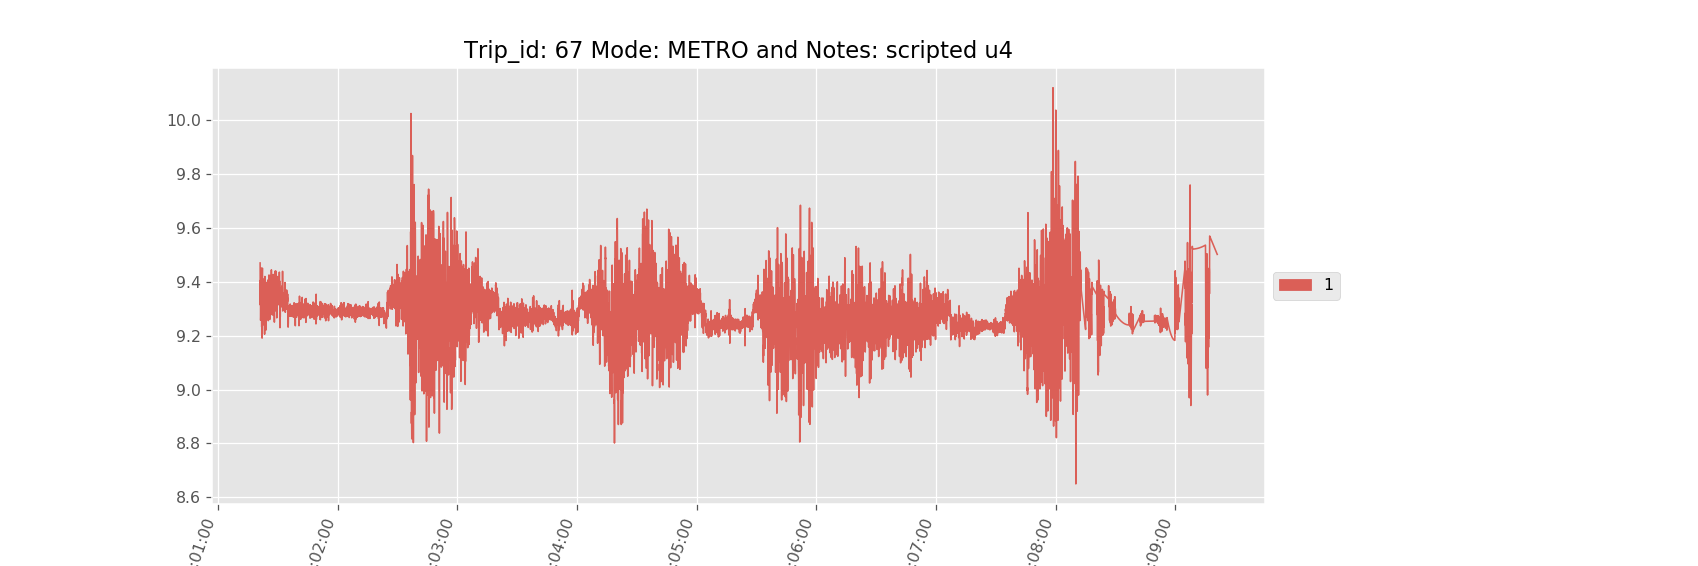

<IPython.core.display.Javascript object>


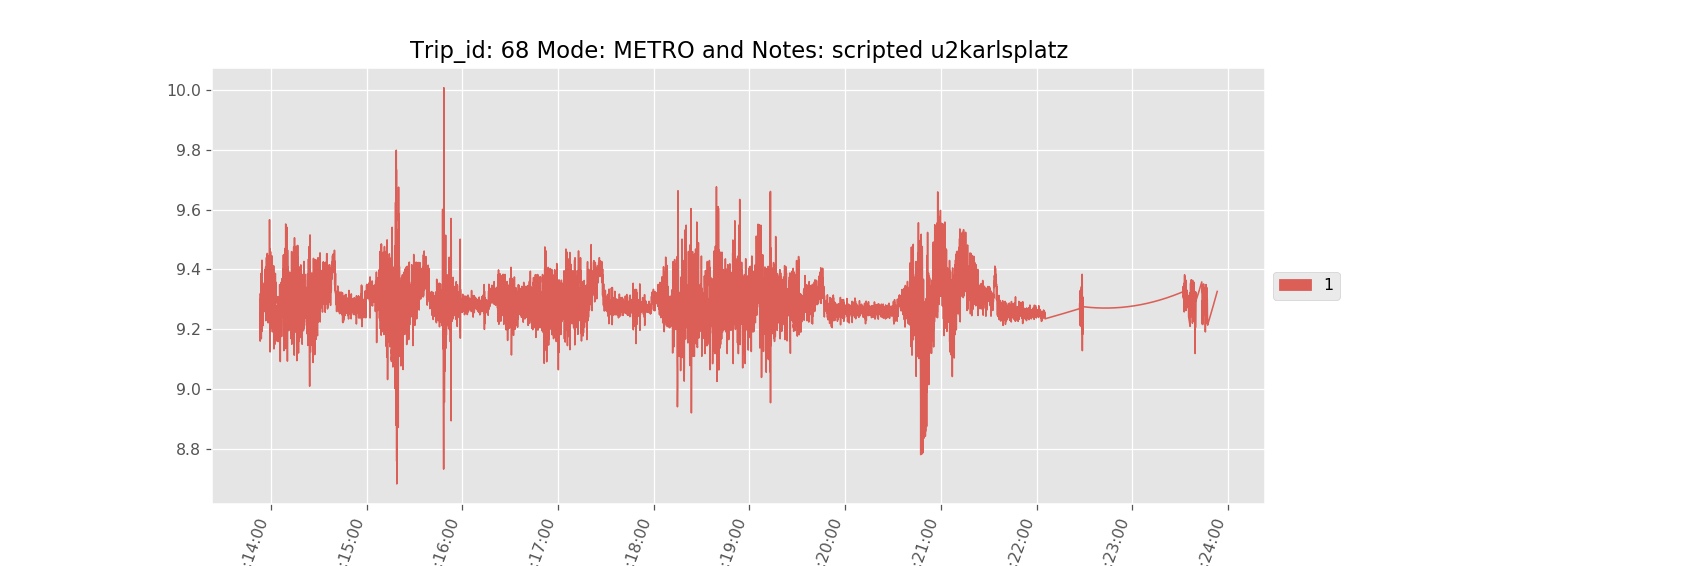

In [25]:

trip_ids = [i for i in euclidean_distances.trip_id.unique()]

for trip_id in trip_ids:
    time, total, labels = \
        get_plot_timeseries_clustering_variables(euclidean_distances,
                                                 trips_unpacked, 
                                                 trip_id, 
                                                 sensor_type="acceleration")


    mode = trips_unpacked[trip_id]["annotation"]["mode"][0]
    notes = trips_unpacked[trip_id]["annotation"]["notes"][0]

    title_format = "Trip_id: {} Mode: {} and Notes: {}"

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title(title_format.format(trip_id,mode,notes))
    plot_timeseries_clustering(time,total, labels, ax=ax)